# Fit a simple kinematic model for the Milky Way disk to the OBA star proper motion data

The model fit in this notebook is the rotation curve presented in equation (7) of [Brunetti & Pfenniger (2010)](https://ui.adsabs.harvard.edu/abs/2010A%26A...510A..34B/abstract).

The Milky Way disk circular velocity curve is fit to the proper motion data, with the following parameters:
* $V_\mathrm{circ,\odot}$ the circular velocity at the location of sun (positive by convention, in km/s)
* $h$ Scale length parameter of the Brunetti & Pfenniger model (pc)
* $p$ Shape parameter of the Brunetti & Pfenniger model (dimensionless, in $[-1,2]$)
* $\mathbf{v}_{\odot,\mathrm{pec}}$ the peculiar motion vector of the sun (km/s)
* $\sigma_{R}$ the velocity dispersion around pure circular motion of the stars in the Galactocentric cylindrical coordinate directions $R$
* $\sigma_{\phi}$ the velocity dispersion around pure circular motion of the stars in the Galactocentric cylindrical coordinate directions $\phi$
* $\sigma_z$ the velocity dispersion around pure circular motion of the stars in the Galactic cylindrical coordinate direction $z$

Fixed parameters:
* $R_\odot$ distance from the sun to the galactic centre, assumed known from GRAVITY measurements. The value used is 8277 pc from [GRAVITY Collaboration et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022A%26A...657L..12G).
* $Y_\odot$ The Galactic Cartesian Y-coordinate of the Sun, by definition 0.
* $Z_\odot$ the height of the sun above (or below) the galactic plane (pc). The value $20.8$ pc from [Bennett & Bovy (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.482.1417B/abstract) is used. NOTE that one can introduce $Z_\odot$ as a parameter in the model below, but experiments show that the data has no constraining power on $Z_\odot$ (even if mathematically the proper motions also depend on $Z_\odot$), as the posterior distribution on the sun's height is the same as the prior.
* $\varpi_i$ parallaxes of the stars are assumed known for now (high precision subsample is used). The parallax uncertainties are thus ignored.
* Coordinates $(\ell,b)_i$, assumed error free

Observations:
* Proper motions in $\ell$ and $b$ (mas/yr)
* Proper motion covariance matrices

## Model details

The stars are assumed to follow strictly circular orbits where the orbital velocity is independent of the galactocentric $z$ coordinate. The velocity $\mathbf{v}$ of a star with parallax $\varpi$ is calculated according to the following steps:

For a star at coordinates $(\ell, b)$ calculate the normal triad $[\mathbf{p}, \mathbf{q}, \mathbf{r}]$:

\begin{equation}
    \mathbf{p} = \begin{pmatrix} -\sin\ell \\ \cos\ell \\ 0 \end{pmatrix}\,,\quad
    \mathbf{q} = \begin{pmatrix} -\sin b\cos\ell \\ -\sin b\sin\ell \\ \cos b \end{pmatrix}\,,\quad
    \mathbf{r} = \begin{pmatrix} \cos b\cos\ell \\ \cos b\sin\ell \\ \sin b \end{pmatrix}\,.
\end{equation}

The calculate the Galactocentric Cartesian star position as:

\begin{equation}
    \mathbf{x} = (1000/\varpi)\mathbf{r} + \mathbf{x}_\odot\,,
\end{equation}

with $\mathbf{x}$ the $(x,y,z)$ position of the star. The coordinate system is right-handed with the Sun located at $(-R_\odot, 0, z_\odot)$ and the sense of the Milky Way rotation such that the azimuthal velocity of the stars $V_\phi$ is negative. The velocity of the star is calculated from the azimuthal velocity $V_\phi(R)$ as:

\begin{equation}
    \mathbf{v} = \begin{pmatrix} -V_\phi(R)\sin\phi \\ V_\phi(R)\cos\phi \\ 0 \end{pmatrix} \quad\text{with}\quad \phi=\text{atan2}(y, x) \quad\text{and}\quad
    R=\sqrt{x^2+y^2}\,.
\end{equation}

The azimuthal velocity $V_\phi(R)$ at the position of the star is calculated as:

\begin{equation}
    V_\phi(R) = -\left(v_0\frac{R}{h}\left[1+\left(\frac{R}{h}\right)^2\right]^{\frac{p-2}{4}}\right) \quad\text{with}\quad
    v_0 = V_{\mathrm{circ},\odot}\left(\frac{R_\odot}{h}\left[1+\left(\frac{R_\odot}{h}\right)^2\right]^{\frac{p-2}{4}}\right)^{-1}\,.
\end{equation}

Finally the proper motions are calculated as:

\begin{equation}
    \mu_{\ell*} = \frac{\varpi}{A_\mathrm{v}}\mathbf{p}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,\quad
    \mu_b = \frac{\varpi}{A_\mathrm{v}}\mathbf{q}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,
\end{equation}

The modelling is done in a Bayesian manner with likelihood:

\begin{equation}
    \mathbf{\mu}_\mathrm{obs} \sim {\cal N}\left(\mathbf{\mu}_\mathrm{model} \mid \mathsf{D}_\mathrm{\mu} \right)\,,
\end{equation}

where the covariance matrix in the likelihood is given as:

\begin{equation}
    \mathsf{D}_\mu = \mathsf{C}_\mu + \begin{pmatrix} \mathbf{p}'\mathsf{S}\mathbf{p} & \mathbf{p}'\mathsf{S}\mathbf{q} \\
    \mathbf{q}'\mathsf{S}\mathbf{p} & \mathbf{q}'\mathsf{S}\mathbf{q}
    \end{pmatrix} (\varpi/A_\mathrm{v})^2\,,
\end{equation}

with the matrix $\mathsf{S}$ representing the velocity dispersion:

\begin{equation}
    \mathsf{S} = \mathsf{J}\mathsf{S}_\mathrm{cyl}\mathsf{J}^\mathrm{T} \quad\text{with}\quad
    \mathsf{J} = \begin{pmatrix}
        \cos\phi & -sin\phi & 0 \\
        \sin\phi & \cos\phi & 0 \\
        0 & 0 & 1
    \end{pmatrix}\,,
    \mathsf{S}_\mathrm{cyl} =
    \begin{pmatrix}
        \sigma^2_{R} & 0 & 0 \\
        0 & \sigma_{\phi}^2 & 0 \\
        0 & 0 & \sigma_z^2
    \end{pmatrix}\,,
\end{equation}

where $\mathsf{S}_\mathrm{cyl}$ is the velocity covariance matrix in cylindrical coordinates and $\mathsf{J}$ represents the rotation to the Cartesian coordinate system (dependent on $\phi$).

The priors on the circular velocity at the sun, $h$, and the sun's peculiar motion components are all normal distributions. The priors on $p$ and the components of $\mathsf{S}_\mathrm{cyl}$ are uniform distributions.

In [2]:
print(" ")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import ujson, os

from scipy.stats import scoreatpercentile as scap

from cmdstanpy import set_cmdstan_path, CmdStanModel, from_csv
import arviz as az
import corner

from astropy.table import Table
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import Galactocentric, ICRS, CartesianDifferential
au_km_year_per_sec = (c.au / (1*u.yr).to(u.s)).to(u.km/u.s).value

from plotstyles import useagab, apply_tufte
from robuststats import rse

from diskkinematicmodel import *
from icrstogal import *
from loadmwsamples import *

useagab()

In [2]:
Rsun = 8.277*u.kpc

obatable = load_mwtable('./data/OBA_sample_1.fits', Rsun=Rsun)

#obatable.write("./data/OBAGoldenSample_xyz.fits", format="fits", overwrite=True)

In [6]:
print(len(obatable['l']))

3023388


## Select a sub-sample to use for fitting

Use a high precision parallax sample of B stars. Futher selections are done on the tangential velocity $v_\mathrm{tan}<v_\mathrm{tan,max}$, distance from the plane $|\sin(b)\times1000/\varpi|<z_\mathrm{max}$, and distance from Galactic centre $R_\mathrm{min}<R<R_\mathrm{max}$. The resulting selection is then subsampled randomly to create a manageable sample for the model fitting process.

The fitting is done in the other file.

Number of stars in selected sample: 6952


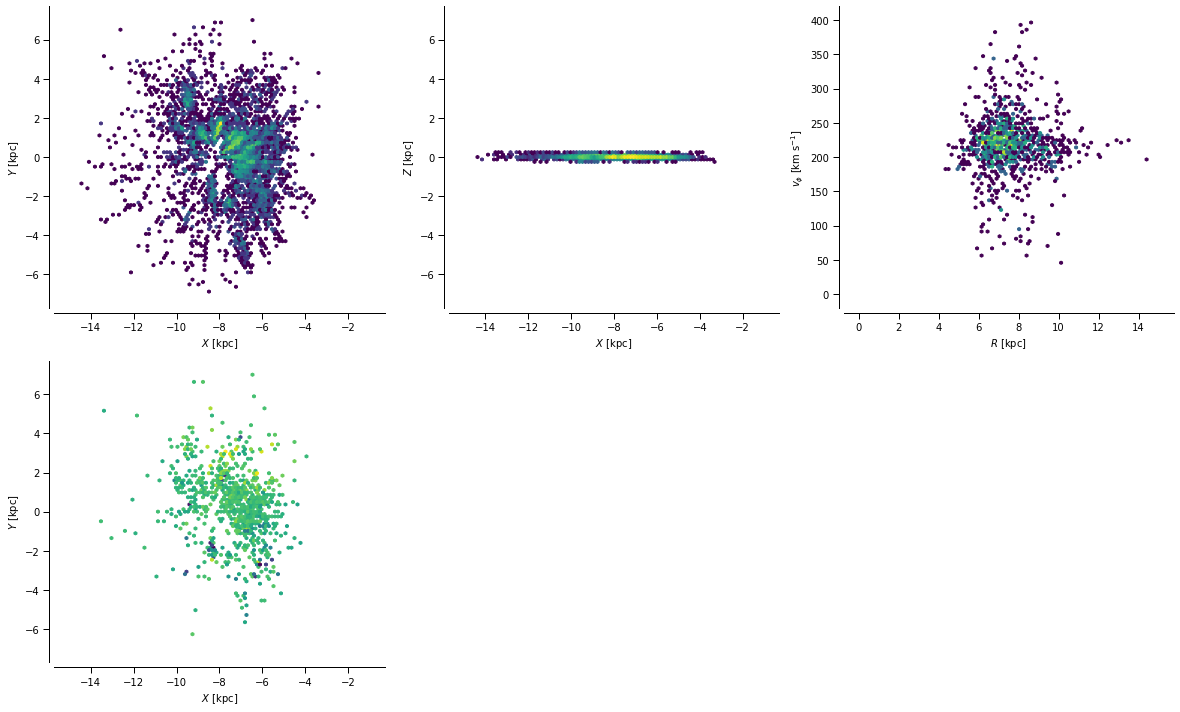

In [3]:
plx_snrlim = 10
vtanhalo = 180.0

startype = (obatable['spectraltype_esphs'] == 'O')
plxfilter = obatable['parallax_over_error']>plx_snrlim
nonhalo = obatable['vtan'] < vtanhalo
zmax = 250

sample_filter_init = startype & plxfilter & nonhalo & (np.abs(np.sin(np.deg2rad(obatable['b']))*1000/obatable['parallax']) < zmax)

R_filter = (obatable['R_gc']>6500.0) & (obatable['R_gc']<15000.0)

sample_filter = sample_filter_init # & R_filter

# Not yet how I first implemented it:
filter_of_choice = "O"

# spt_lum_filter = filter_dictionary[filter_of_choice]
fit_save_location = os.path.join(os.getcwd(), 'fitfiles', filter_of_choice)
#

print(f"Number of stars in selected sample: {obatable['ra'][sample_filter].size}")

subsample_size = 3000
if (obatable['ra'][sample_filter].size <=subsample_size):
    oba_subsample = obatable[sample_filter]
else:
    random_subsample = np.random.choice(np.arange(obatable['ra'][sample_filter].size), size=subsample_size, replace=False)
    oba_subsample = obatable[sample_filter][random_subsample]
    
plotgrid = [-15, -1, -7, 7]
fig=plt.figure(figsize=(16.5,10), tight_layout=True)

gs = fig.add_gridspec(2, 3, figure=fig)

ax_xy = fig.add_subplot(gs[0,0])
apply_tufte(ax_xy)
ax_xz = fig.add_subplot(gs[0,1])
apply_tufte(ax_xz)
ax_rvphi = fig.add_subplot(gs[0,2])
apply_tufte(ax_rvphi)
ax_xy_vphi = fig.add_subplot(gs[1,0])
apply_tufte(ax_xy_vphi)

ax_xy.hexbin(obatable['x_gc'][sample_filter]/1000, obatable['y_gc'][sample_filter]/1000, mincnt=1, bins='log', extent=plotgrid)
ax_xy.set_xlabel(r'$X$ [kpc]') 
ax_xy.set_ylabel(r'$Y$ [kpc]') 

ax_xz.hexbin(obatable['x_gc'][sample_filter]/1000, obatable['z_gc'][sample_filter]/1000, mincnt=1, bins='log', extent=plotgrid)
ax_xz.set_xlabel(r'$X$ [kpc]') 
ax_xz.set_ylabel(r'$Z$ [kpc]')

hasrvs = sample_filter & obatable['rvvalid']
ax_rvphi.hexbin(obatable['R_gc'][hasrvs]/1000, obatable['v_phi_gc'][hasrvs], mincnt=1, bins='log', extent=[0,15,0,400])
ax_rvphi.set_xlabel(r'$R$ [kpc]') 
ax_rvphi.set_ylabel(r'$v_\phi$ [km s$^{-1}$]')

ax_xy_vphi.hexbin(obatable['x_gc'][hasrvs]/1000, obatable['y_gc'][hasrvs]/1000, mincnt=0, C=obatable['v_phi_gc'][hasrvs],
                  reduce_C_function=np.median, bins='log', extent=plotgrid)
ax_xy_vphi.set_xlabel(r'$X$ [kpc]') 
ax_xy_vphi.set_ylabel(r'$Y$ [kpc]') 

plt.show()

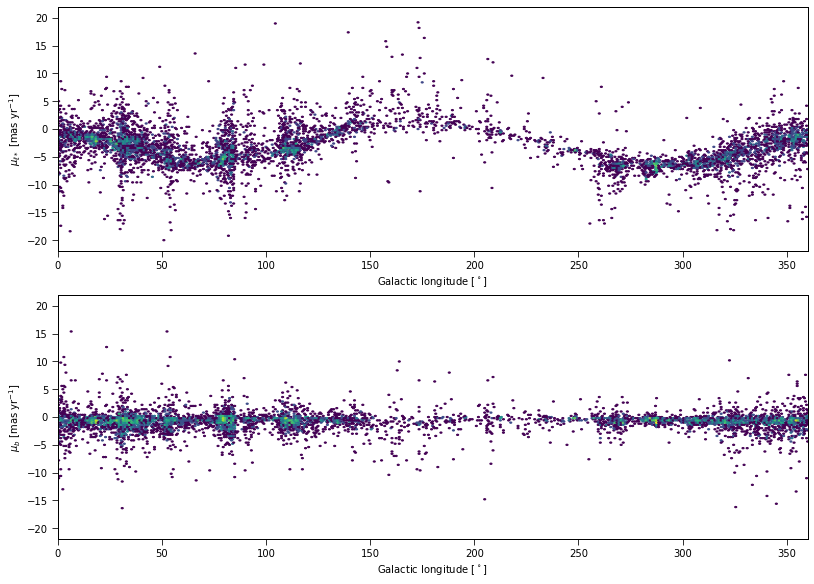

In [5]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

# plt.savefig('img2/pml-pmb-vs-galon_O.png')

plt.show()

##### Some old/usefull definitions:

In [4]:
dsinb = (np.sin(np.deg2rad(obatable['b']))*1000.0/obatable['parallax'])[sample_filter]
zsun = 0.0*u.kpc #-np.median(dsinb)*u.pc

nsources = oba_subsample['ra'].size
print(f"Number of sources in sample: {nsources}")

oba_data = {'N': nsources, 
            'galon': np.deg2rad(oba_subsample['l']).tolist(), 
            'galat': np.deg2rad(oba_subsample['b']).tolist(),
            'pml_obs': oba_subsample['pml'].tolist(),
            'pml_obs_unc': oba_subsample['pml_error'].tolist(),
            'pmb_obs': oba_subsample['pmb'].tolist(),
            'pmb_obs_unc': oba_subsample['pmb_error'].tolist(),
            'pml_pmb_corr': oba_subsample['pml_pmb_corr'].tolist(),
            'plx_obs': oba_subsample['parallax'].tolist(),
            'Rsun': Rsun.value,
            'Zsun':zsun.value
            }
with open('oba.data.json', 'w') as fp:
    ujson.dump(oba_data, fp)
    fp.close()

bp2010_model = {'stanfile':'mwdisk-bp2010-model.stan', 
               'npars':9,
               'parnames':['Vcirc_sun', 'hbp', 'pbp', 'Vsun_pec_x', 'Vsun_pec_y', 'Vsun_pec_z', 'vdispR', 'vdispPhi', 'vdispZ'],
               'labels':[r'$V_{\mathrm{circ},\odot}}$', r'$h$', r'$p$', r'$V_{X,\odot}(\mathrm{pec})$', r'$V_{Y,\odot}(\mathrm{pec})$', 
                         r'$V_{Z,\odot}(\mathrm{pec})$', r'$\sigma_{v,R}$', r'$\sigma_{v,\phi}$', r'$\sigma_{v,z}$'], 
               'inits':{'Vcirc_sun':220.0, 'hbp':4.0, 'pbp':0.0, 'Vsun_pec_x':11.1, 'Vsun_pec_y':12.24, 'Vsun_pec_z':7.25, 'vdispR':10.0, 'vdispPhi':10.0, 'vdispZ':10.0},
               'best_params':{'Vcirc_sun':np.nan, 'hbp':np.nan, 'pbp':np.nan, 'Vsun_pec_x':np.nan, 'Vsun_pec_y':np.nan, 'Vsun_pec_z':np.nan, 
                              'vdispR':np.nan, 'vdispPhi':np.nan, 'vdispZ':np.nan}
              }

stan_model = bp2010_model

Number of sources in sample: 3000


## Sample posterior

Feed the OBA star proper motion and parallax data to the Stan model and sample the posterior for the Milky Way parameters.

In [7]:
# oba_stan = os.path.join(os.getcwd(), stan_model['stanfile'])
# set_cmdstan_path(os.path.join('C:/Users/rjrri/.cmdstan/', 'cmdstan-2.31.0'))
# oba_data_path = os.path.join(os.getcwd(), 'oba.data.json')

# nwarmup = 500
# nsampling = 1000
# nchains = 4

# oba_model = CmdStanModel(stan_file=oba_stan)
# oba_fit = oba_model.sample(chains=nchains, iter_warmup=nwarmup, iter_sampling=nsampling, thin=1, data=oba_data_path, save_warmup=False, show_progress=True, 
#                           output_dir=fit_save_location)
# #oba_fit = oba_model.sample(chains=4, inits=stan_model['inits'], iter_warmup=500, iter_sampling=1000, thin=1, 
# #                           data=oba_data_path, save_warmup=False, show_progress='notebook')

22:45:56 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:26:34 - cmdstanpy - INFO - CmdStan done processing.
23:26:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/mwdisk-bp2010-model.stan', line 183, column 2 to column 21)
	Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/mwdisk-bp2010-model.stan', line 183, column 2 to column 21)
	Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/mwdisk-bp2010-model.stan', line 183, column 2 to column 21)
	Exception: mwdisk_bp2010_model_model_namespace::log_prob: scov is not symmetric. scov[1,2] = nan, but scov[2,1] = nan (in 'C:/Users/rjrri/DOCUME~1/UNIVER~1/FIRSTP~1/MILKYW~2/

### Reading in the fit results

In [5]:
oba_stan = os.path.join(os.getcwd(), stan_model['stanfile'])
set_cmdstan_path(os.path.join('C:/Users/rjrri/.cmdstan/', 'cmdstan-2.31.0'))
oba_data_path = os.path.join(os.getcwd(), 'oba.data.json')

nwarmup = 500
nsampling = 1000
nchains = 4

oba_model = CmdStanModel(stan_file=oba_stan)

# Choice of stars
filter_of_choice = "O"

fit_save_location = os.path.join(os.getcwd(), 'fitfiles', filter_of_choice)

oba_fit = from_csv(path=fit_save_location)
print(fit_save_location[-len(filter_of_choice):])

O


In [9]:
# Summary of the results
oba_fit.summary()[0:stan_model['npars']+1]

Mean      MCSE    StdDev           5%          50%  \
lp__       -5757.980000  0.052630  2.174290 -5762.170000 -5757.640000   
Vcirc_sun    233.046000  0.025157  1.872240   229.986000   233.017000   
hbp            4.374060  0.009793  0.430951     3.672640     4.376750   
pbp           -0.620747  0.002794  0.123427    -0.835432    -0.614679   
Vsun_pec_x    11.207900  0.007688  0.521188    10.356400    11.205000   
Vsun_pec_y    10.558400  0.012863  0.697565     9.422860    10.554500   
Vsun_pec_z     7.735320  0.003122  0.208580     7.385800     7.738880   
vdispR        20.588000  0.006509  0.408749    19.902500    20.584400   
vdispPhi      18.273000  0.007891  0.442902    17.559400    18.259800   
vdispZ        11.407100  0.002175  0.146641    11.168200    11.405000   

                    95%    N_Eff   N_Eff/s     R_hat  
lp__       -5755.040000  1706.71  0.304139  1.000100  
Vcirc_sun    236.090000  5538.54  0.986982  0.999843  
hbp            5.085380  1936.47  0.345085  1.001420  
pbp           -0.425835  1951.23  0.347714  1.001150  
Vsun_pec_x    12.070000  4595.30  0.818894  1.000220  
Vsun_pec_y    11.700400  2940.70  0.524041  1.000630  
Vsun_pec_z     8.073000  4462.19  0.795174  1.000100  
vdispR        21.270500  3943.66  0.702770  0.999699  
vdispPhi      19.001700  3150.42  0.561413  0.999407  
vdispZ        11.648800  4544.77  0.809889  0.999946

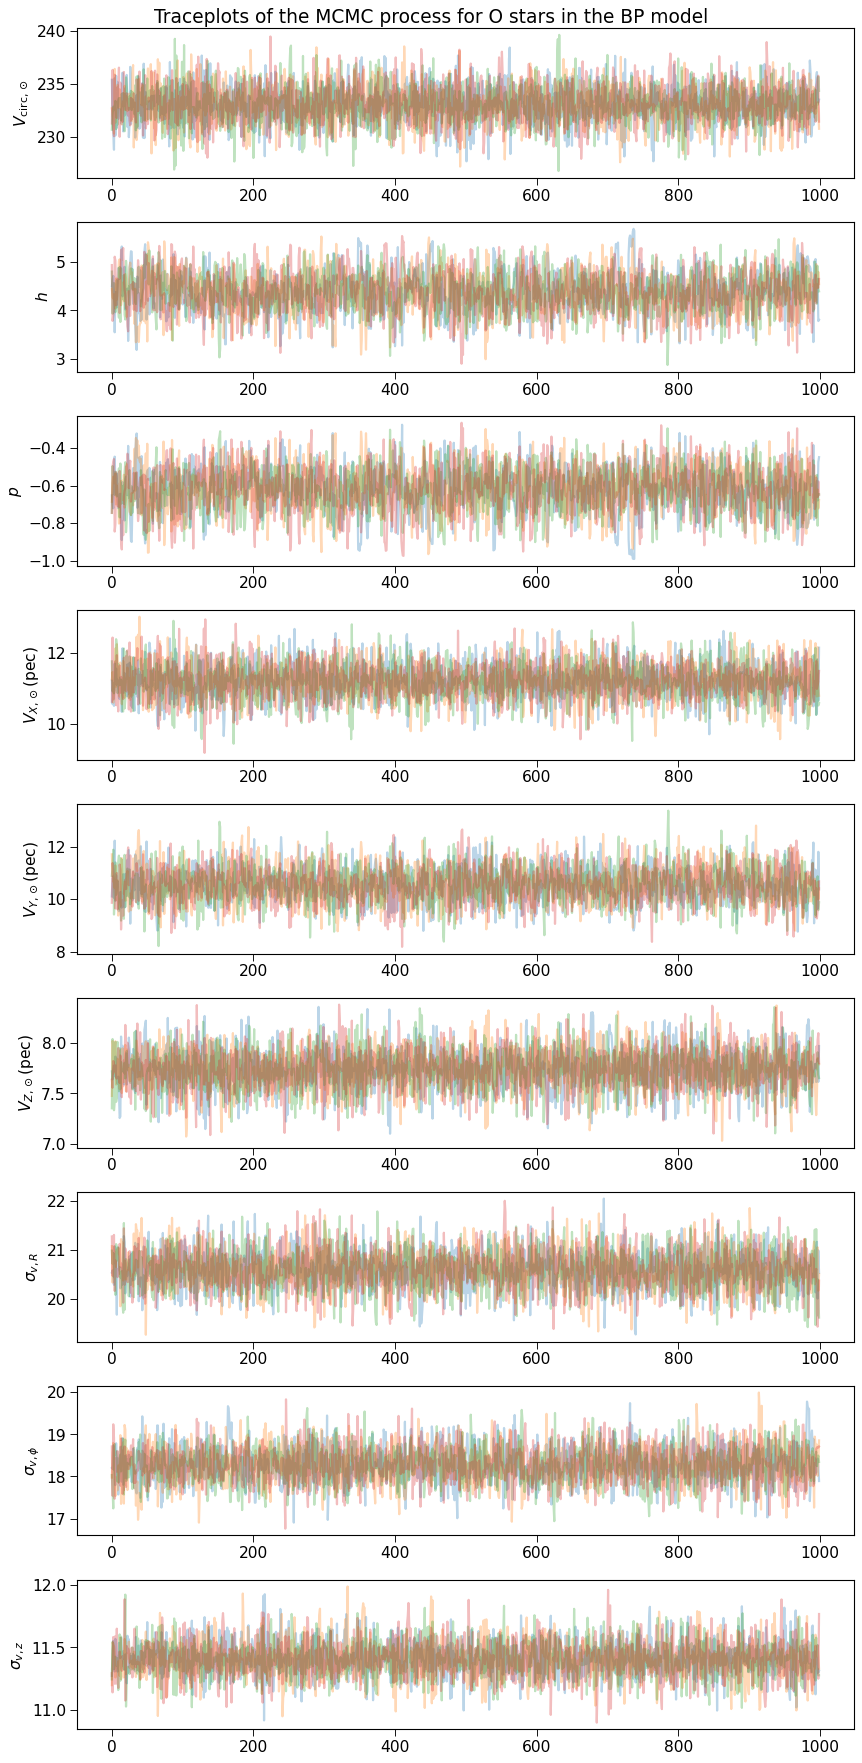

In [30]:
useagab(usetex=False, fontfam='sans-serif', fontsize=14, ncolors=10)

fig, axes = plt.subplots(ncols=1, nrows=stan_model['npars'], tight_layout=True, figsize=(11,2.5*stan_model['npars']))

for i, lab in zip(range(stan_model['npars']), stan_model['labels']):
    axes[i].plot(oba_fit.draws()[:,:,7+i], alpha=0.3)
    axes[i].set_ylabel(lab)

fig.suptitle("Traceplots of the MCMC process for O stars in the BP model")
# plt.savefig('img2/Traceplot_O_BP.png')
plt.show()

## Cornerplot of the posterior samples

Vcirc_sun = 233.0+1.9-1.8
hbp = 4.4+0.4-0.4
pbp = -0.6+0.1-0.1
Vsun_pec_x = 11.2+0.5-0.5
Vsun_pec_y = 10.6+0.7-0.7
Vsun_pec_z = 7.7+0.2-0.2
vdispR = 20.6+0.4-0.4
vdispPhi = 18.3+0.5-0.4
vdispZ = 11.4+0.1-0.1


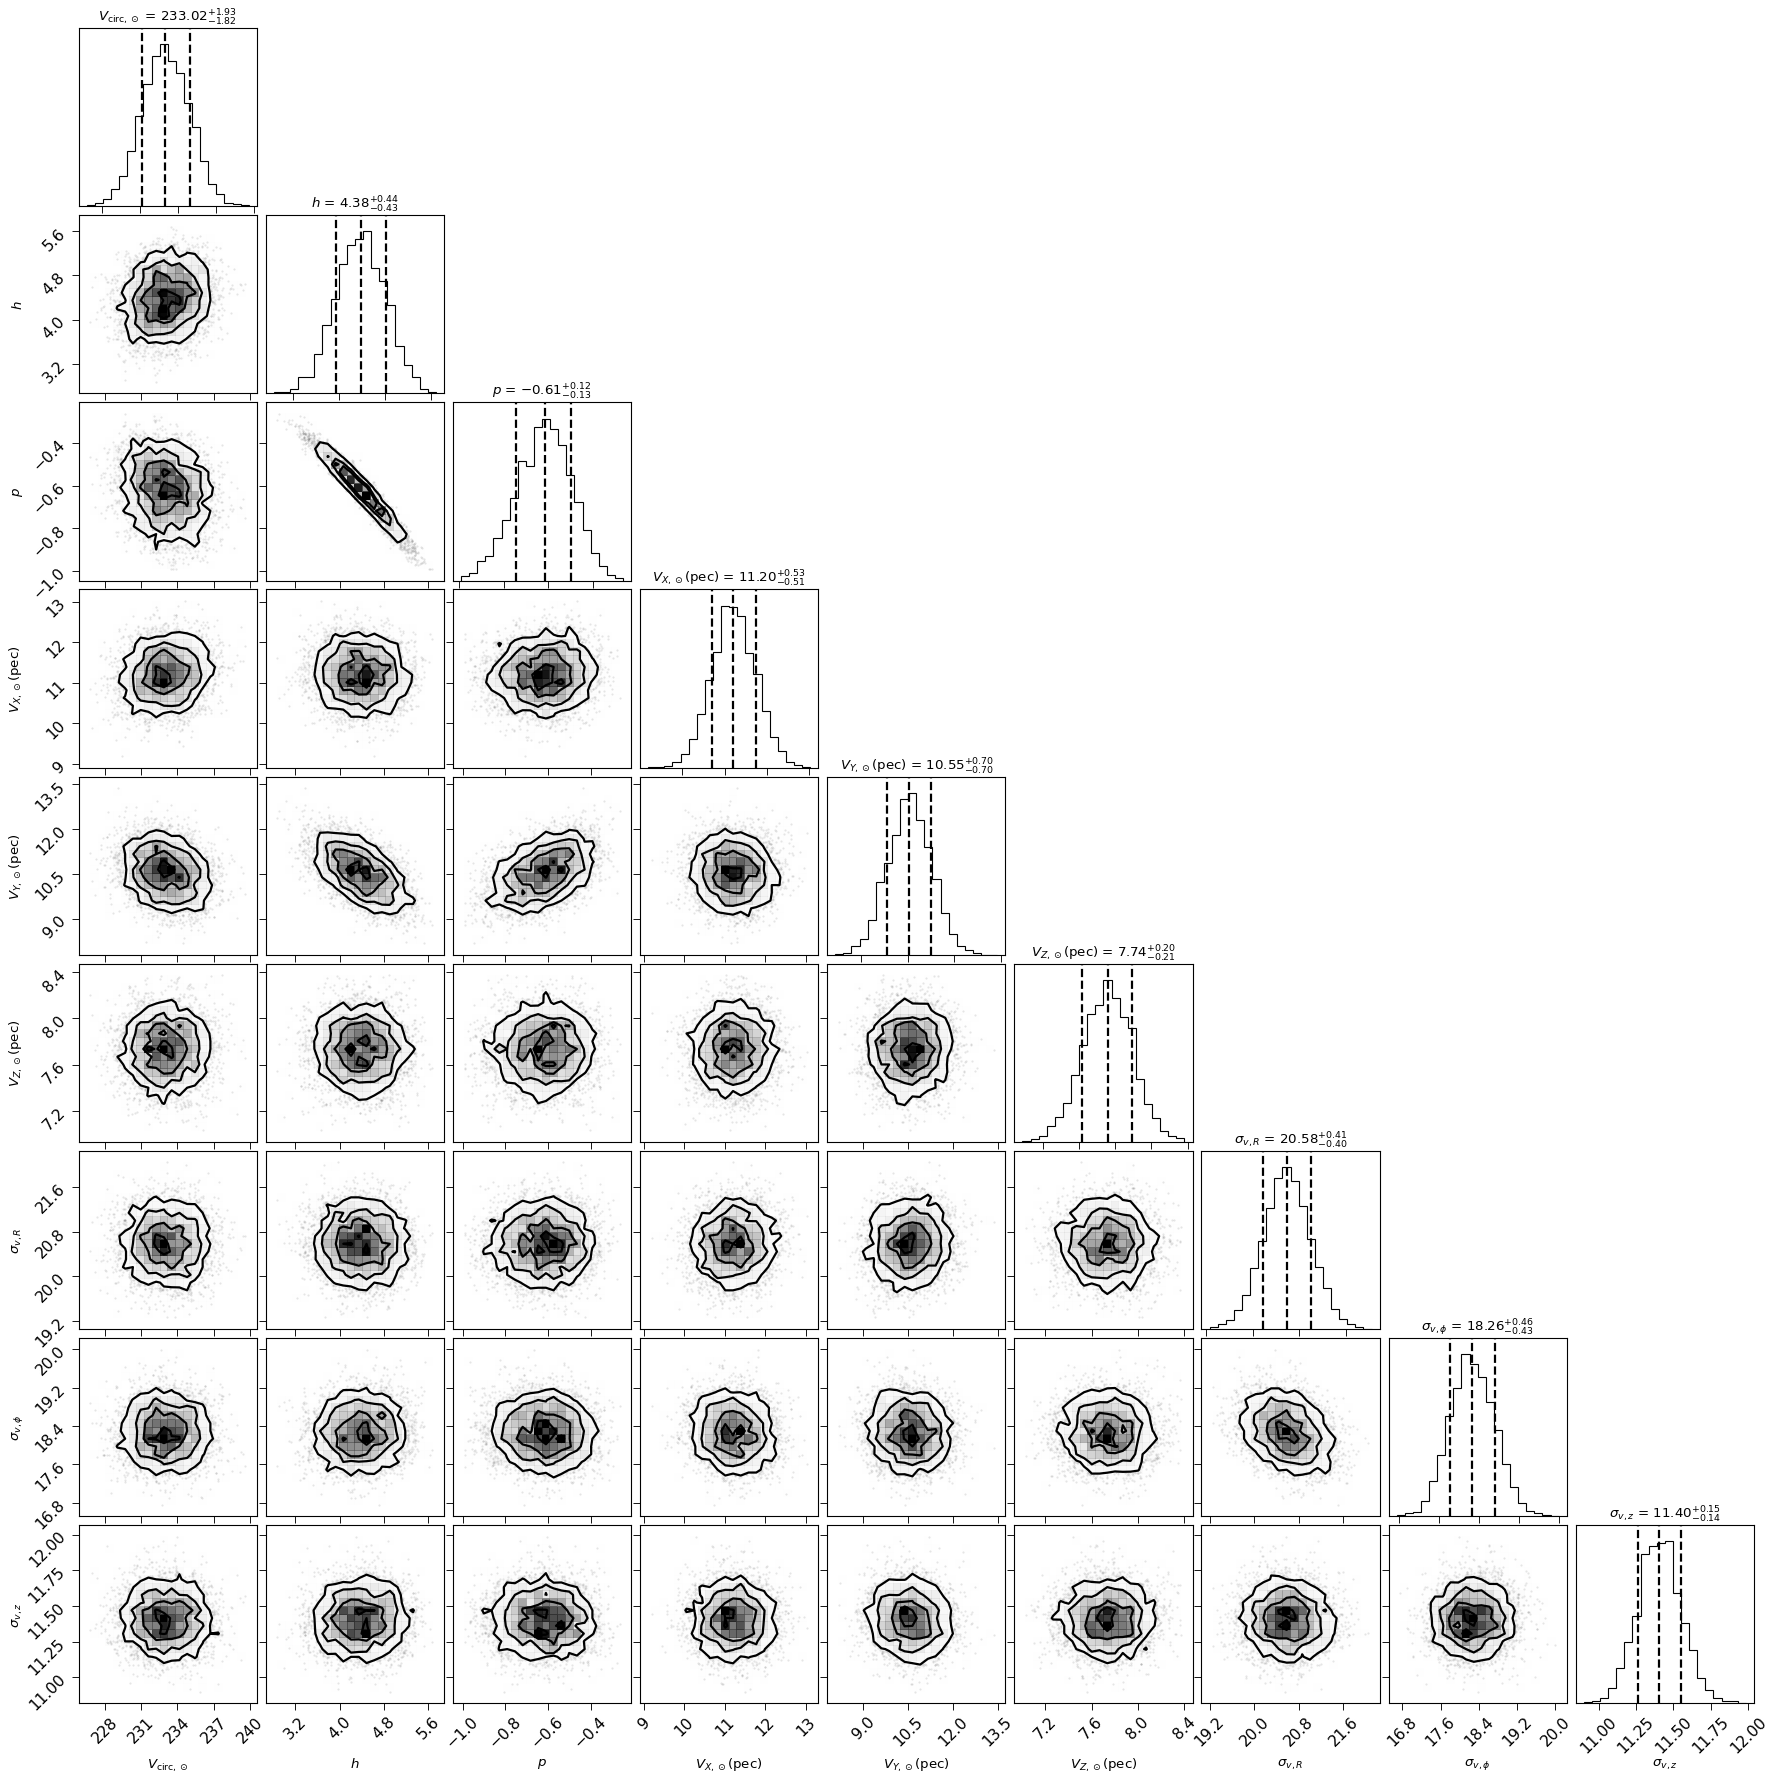

In [6]:
for par in stan_model['parnames']:
    vals = oba_fit.stan_variable(par)
    stan_model['best_params'][par] = np.median(vals)
    q1, q2, q3 = scap(vals, [16, 50, 84])
    print(f"{par} = {q2:.1f}+{q3-q2:.1f}-{q2-q1:.1f}")
    
sample_lists = []
for i, par in zip(range(7, 7+stan_model['npars']), stan_model['parnames']):
    sample_lists.append(oba_fit.draws()[:,:,i].flatten())
samples = np.vstack(sample_lists).transpose()
                         
useagab(usetex=False, fontfam='sans-serif', fontsize=14, ncolors=10)

figcorner = plt.figure(figsize=(2.5*stan_model['npars'],2.5*stan_model['npars']))
corner.corner(
    samples, labels=stan_model['labels'], 
    label_kwargs={"fontsize":12}, title_kwargs={"fontsize": 12},
    truth_color='r', quantiles=[0.16,0.50,0.84], show_titles=True, fig=figcorner
)
# plt.savefig('img2/Corner_BP_O.png')
plt.show()

## Sgr A* proper motion (assuming no intrinsic motion for this source) and Oort constants

In [7]:
sunpos = np.array([-Rsun.value, 0, zsun.value])*u.kpc
vsunpeculiar = np.array([stan_model['best_params']['Vsun_pec_x'], stan_model['best_params']['Vsun_pec_y'], stan_model['best_params']['Vsun_pec_z']])*u.km/u.s
vcircsun = stan_model['best_params']['Vcirc_sun']
hbp = stan_model['best_params']['hbp']
pbp = stan_model['best_params']['pbp']

diskmodel_best = DiskKinematicModel(BrunettiPfennigerRotationCurve(vcircsun, Rsun.value, hbp, pbp), sunpos, vsunpeculiar)


vsunx_samples = oba_fit.draws()[:,:,9].flatten()
vsuny_samples = oba_fit.draws()[:,:,10].flatten()+oba_fit.draws()[:,:,7].flatten()
vsunz_samples = oba_fit.draws()[:,:,11].flatten()
vsunvec_samples = np.vstack([vsunx_samples, vsuny_samples, vsunz_samples])

vcircsun_samples = oba_fit.draws()[:,:,7].flatten()
h_samples = oba_fit.draws()[:,:,8].flatten()
p_samples = oba_fit.draws()[:,:,9].flatten()

ra_sgr = (17.0+45.0/60.0+40.0409/3600.0)*15
dec_sgr = -29 - 28.118/2300
l_sgr, b_sgr = ct.transform_sky_coordinates(np.deg2rad(ra_sgr), np.deg2rad(dec_sgr))
print(np.rad2deg(l_sgr)-360, np.rad2deg(b_sgr))

p_sgr = np.array([-np.sin(l_sgr), np.cos(l_sgr), 0.0])
q_sgr = np.array([-np.sin(b_sgr)*np.cos(l_sgr), -np.sin(b_sgr)*np.sin(l_sgr), np.cos(b_sgr)])

mu_sgr_xy_samples = -np.dot(p_sgr, vsunvec_samples)/(Rsun*au_km_year_per_sec).value
mu_sgr_z_samples = -np.dot(q_sgr, vsunvec_samples)/(Rsun*au_km_year_per_sec).value
mu_sgr_xy = np.median(mu_sgr_xy_samples)
mu_sgr_xy_rse = rse(mu_sgr_xy_samples)
mu_sgr_z = np.median(mu_sgr_z_samples)
mu_sgr_z_rse = rse(mu_sgr_z_samples)

print(f"mu_sgr_xy = {mu_sgr_xy:.2f}  +/- {mu_sgr_xy_rse:.3f}")
print(f"mu_sgr_z = {mu_sgr_z:.2f}  +/- {mu_sgr_z_rse:.3f}")

oortA_samples, oortB_samples = BrunettiPfennigerRotationCurve.oort_ab_static(Rsun.value, vcircsun_samples, h_samples, p_samples)
oortAminB_samples = oortA_samples - oortB_samples
oortA = np.median(oortA_samples)
oortA_rse = rse(oortA_samples)
oortB = np.median(oortB_samples)
oortB_rse = rse(oortB_samples)
oortAminB = np.median(oortAminB_samples)
oortAminB_rse = rse(oortAminB_samples)

print(f"Oort A = {oortA:.2f}  +/- {oortA_rse:.3f}")
print(f"Oort B = {oortB:.2f}  +/- {oortB_rse:.3f}")
print(f"Oort A-B = {oortAminB:.2f}  +/- {oortAminB_rse:.3f}")

-0.05951722261414716 -0.04846468783278978
mu_sgr_xy = -6.22  +/- 0.051
mu_sgr_z = -0.27  +/- 0.018
Oort A = 14.43  +/- 0.250
Oort B = -13.72  +/- 0.195
Oort A-B = 28.15  +/- 0.226


## Model check through predictive posterior

In [8]:
idata = az.from_cmdstanpy(
    posterior=oba_fit,
    posterior_predictive=['pred_pml', 'pred_pmb'],
    observed_data={'pml_obs': oba_data['pml_obs'],
                   'pmb_obs': oba_data['pmb_obs']},
    coords={'nsources': np.arange(oba_data['N'])},
    dims={
        'pml_obs': ['nsources'],
        'pmb_obs': ['nsources'],
        'pred_pml': ['nsources'],
        'pred_pmb': ['nsources'],
    },
)

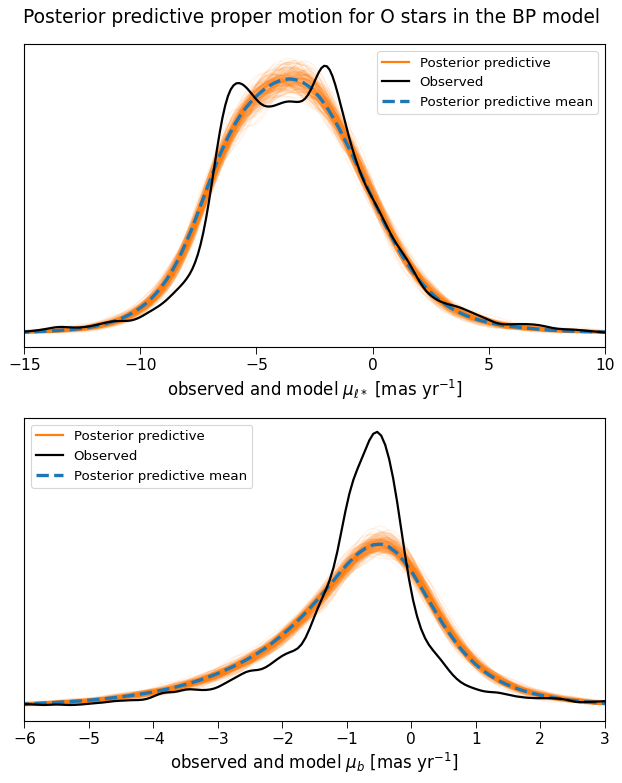

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 2*5), tight_layout=True)
az.plot_ppc(idata, ax=axes, data_pairs={'pml_obs':'pred_pml', 'pmb_obs':'pred_pmb'}, 
            num_pp_samples=200, alpha=0.1, colors=['C1', 'k', 'C0'])
for ax in axes:
    ax.legend(fontsize=12)
    #apply_tufte(ax)
axes[0].set_xlim(-15,10)
axes[1].set_xlim(-6,3)
axes[0].set_xlabel(r'observed and model $\mu_{\ell*}$ [mas yr$^{-1}$]')
axes[1].set_xlabel(r'observed and model $\mu_b$ [mas yr$^{-1}$]')

fig.suptitle('Posterior predictive proper motion for O stars in the BP model')
# plt.savefig('img2/posterior_predictive_BP_O.png')

plt.show()

[224.22727693 223.25805244 234.2491976  ... 252.52932585 228.49602902
 241.63634664] km / s


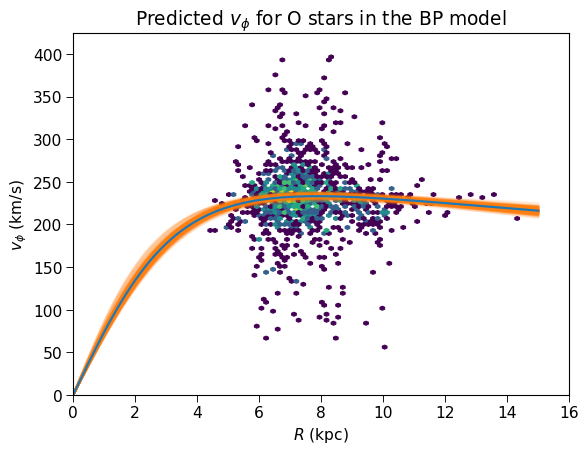

In [9]:
hasrvs = sample_filter & obatable['rvvalid']

icrs_coords = ICRS(
    ra=(obatable['ra'][hasrvs].data * u.deg).to(u.rad),
    dec=(obatable['dec'][hasrvs].data * u.deg).to(u.rad),
    distance=(1000 / obatable['parallax'][hasrvs].data) * u.pc,
    pm_ra_cosdec=obatable['pmra'][hasrvs].data * u.mas / u.yr,
    pm_dec=obatable['pmdec'][hasrvs].data * u.mas / u.yr,
    radial_velocity=obatable['radial_velocity'][hasrvs].data * u.km / u.s,
)

_, _, gc_cyl = transform_to_galactic(
    icrs_coords,
    galcendist=Rsun,
    sunheight=zsun,
    vcircsun=vcircsun*u.km/u.s,
    vsunpec=vsunpeculiar,
)

rotcur = lambda x, h, p : x/h * np.power(1+(x/h)**2, (p-2)/4)

fig, axvphi = plt.subplots(1, 1, figsize=(8,6))

vphi_from_fit = -(gc_cyl.d_phi.to(u.rad / u.yr) / u.rad * gc_cyl.rho).to(u.km / u.s)
print(vphi_from_fit)

axvphi.hexbin(gc_cyl.rho.to(u.kpc), vphi_from_fit, mincnt=1, bins='log', extent=[0,15,0,400])

rcyl = np.linspace(0,15,1000)

inds = np.random.choice(p_samples.size, size=200, replace=False)
for i in inds:
    v0 = vcircsun_samples[i]/rotcur(Rsun.value, h_samples[i], p_samples[i])
    axvphi.plot(rcyl, v0*rotcur(rcyl, h_samples[i], p_samples[i]), c='C1', alpha=0.1)

v0 = vcircsun/rotcur(Rsun.value, hbp, pbp)
axvphi.plot(rcyl, v0*rotcur(rcyl, hbp, pbp), c='C0', lw=2)

plt.xlabel(r'$R$ (kpc)')
plt.ylabel(r'$v_{\phi}$ (km/s)')
plt.xlim(0, 16)
plt.ylim(0, 425)
plt.title(r"Predicted $v_{\phi}$ for O stars in the BP model")
# plt.savefig("img2/v_phi_and_rotcur_from_fit_BP_O.png")
plt.show()



## Compare model predictions and observations in the proper motion vs longitude plots

Show both a model prediction for stars at a fixed distance from the sun and simulated proper motion data, using the simulated data ('generated quantities') from the STAN model.

1921.9507577528352 pc


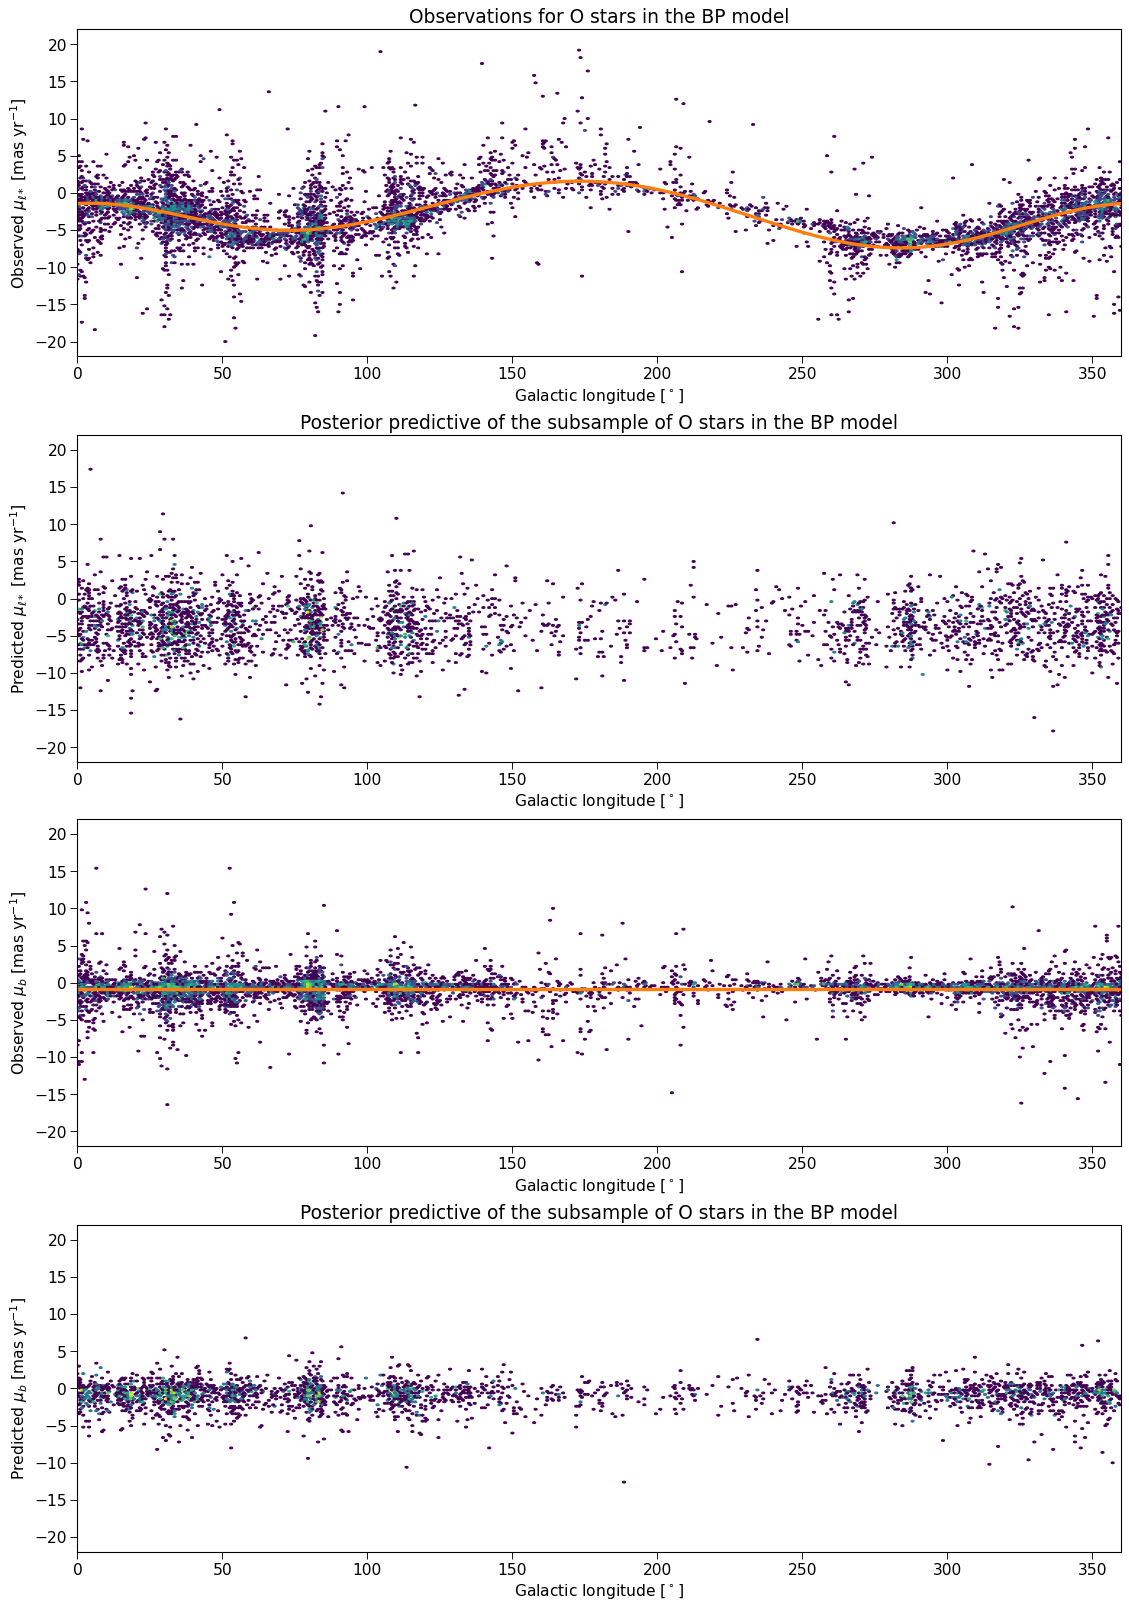

In [10]:
galon = np.linspace(0,360,361)*u.deg

median_dist = 1000/np.median(obatable['parallax'][sample_filter])
print(median_dist, 'pc')

#pml_model, pmb_model, vrad_model = diskmodel_flat.observables(1000.0/obatable['parallax'][sample_filter].value*u.pc, 
#                                                              obatable['l'][sample_filter]*u.deg, obatable['b'][sample_filter]*u.deg)

chain = np.random.choice(nchains)
mcsample = np.random.choice(nsampling)

fig=plt.figure(constrained_layout=True, figsize=(14,4*5))

gs = GridSpec(4, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'Observed $\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title("Observations for O stars in the BP model")

ax_lmul_model = fig.add_subplot(gs[1,0])
#im_lmul_model = ax_lmul_model.hexbin(obatable['l'][sample_filter], pml_model, 
#                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
im_lmul_model = ax_lmul_model.hexbin(oba_subsample['l'], idata.posterior_predictive['pred_pml'][chain, mcsample, :], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
# im_lmul_model = ax_lmul_model.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20], alpha=0.05)
ax_lmul_model.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul_model.set_ylabel(r'Predicted $\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul_model.set_xlim(0,360)
ax_lmul_model.set_title("Posterior predictive of the subsample of O stars in the BP model")

ax_lmub = fig.add_subplot(gs[2,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'Observed $\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

ax_lmub_model = fig.add_subplot(gs[3,0])
#im_lmub_model = ax_lmub_model.hexbin(obatable['l'][sample_filter], pmb_model, 
#                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
im_lmub_model = ax_lmub_model.hexbin(oba_subsample['l'], idata.posterior_predictive['pred_pmb'][chain, mcsample, :], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub_model.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub_model.set_ylabel(r'Predicted $\mu_b$ [mas yr$^{-1}$]')
ax_lmub_model.set_xlim(0,360)
ax_lmub_model.set_title("Posterior predictive of the subsample of O stars in the BP model")

for dist in [median_dist]:
    distance = np.zeros_like(galon.value) + dist*u.pc
    galat = np.zeros_like(galon.value) - np.rad2deg(np.arcsin(zsun.value/dist))*u.deg
    pml_model, pmb_model, vrad_model = diskmodel_best.observables(distance, galon, galat)
    ax_lmul.plot(galon, pml_model, c='C1', lw=3, label=rf'$d={dist:.0f}$ pc')
#     ax_lmul.plot(galon, vrad_model, c='C1', lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmub.plot(galon, pmb_model, c='C1', lw=3)
#     ax_lmub.plot(galon, vrad_model, c='C1', lw=3)

# plt.savefig('img2/Observations_and_posterior_predictive_mu_lb_vs_galon_BP_O.png')
plt.show()

# A look at the proper motions

## Overplot model predictions for specific distances on observed proper motions

Median distance: 1921.9507577528352


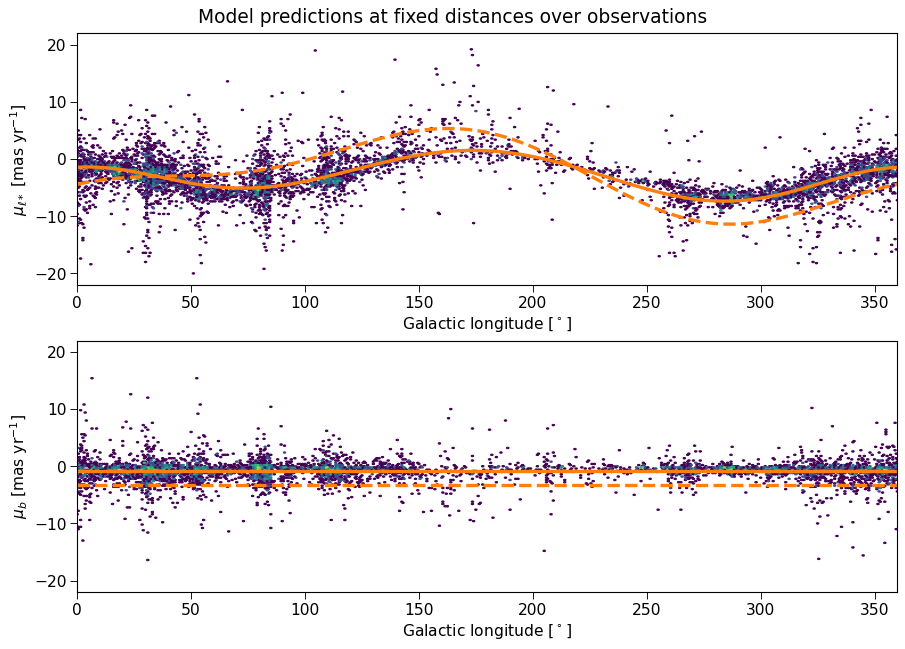

In [11]:
median_dist = 1000/np.median(obatable['parallax'][sample_filter])

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))

gs = GridSpec(2, 1, figure=fig)

ax_lmul = fig.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], obatable['pml'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], obatable['pmb'][sample_filter], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

print("Median distance:", median_dist)
for dist, lstyle in zip([500, 2000], ['--C1', '-C1']):
    distance = np.zeros_like(galon.value) + dist*u.pc
    galat = np.zeros_like(galon.value) - np.rad2deg(np.arcsin(zsun.value/dist))*u.deg
    pml_model, pmb_model, vrad_model = diskmodel_best.observables(distance, galon, galat)
    ax_lmul.plot(galon, pml_model, lstyle, lw=3, label=rf'$d={dist:.0f}$ pc')
    ax_lmub.plot(galon, pmb_model, lstyle, lw=3)

plt.suptitle('Model predictions at fixed distances over observations')
# plt.savefig('img2/pml-pmb-vs-galon-plusmodel_BP_O.png')

plt.show()

## Calculating peculiar proper motions and tangential velocities

In [12]:
galon = np.array(obatable['l'][sample_filter].tolist())
galat = np.array(obatable['b'][sample_filter].tolist())

In [13]:
A = 4.74047  # km s^-1 yr

prop_mot_lon = np.array(obatable['pml'][sample_filter].tolist())
prop_mot_lat = np.array(obatable['pmb'][sample_filter].tolist())
plx = np.array(obatable['parallax'][sample_filter].tolist())
galon = np.array(obatable['l'][sample_filter].tolist())*u.deg
galat = np.array(obatable['b'][sample_filter].tolist())*u.deg

rvec = np.array([np.cos(galat)*np.cos(galon), np.cos(galat)*np.sin(galon), np.sin(galat)]).T

pml_model, pmb_model, vrad_model = diskmodel_best.observables(1/plx*u.kpc, galon, galat)
pml_diff = prop_mot_lon - pml_model.value
pmb_diff = prop_mot_lat - pmb_model.value

In [14]:
min_dist = np.min(1000/(obatable[sample_filter]['parallax']))
max_dist = np.max(1000/(obatable[sample_filter]['parallax']))
med_dist = 1000/np.median(obatable[sample_filter]['parallax'])
min_galat = np.min(galat)
max_galat = np.max(galat)
min_abs_galat = np.min(np.abs(galat))
max_abs_galat = np.max(np.abs(galat))
print("min_dist", min_dist, "pc")
print("max_dist", max_dist, "pc")
print("med_dist", med_dist, "pc")
print("min_galat", min_galat)
print("max_galat", max_galat)
print("min R:", np.min(obatable[sample_filter]['R_gc']))
print("min R:", np.max(obatable[sample_filter]['R_gc']))

min_dist 141.70827057149117 pc
max_dist 8270.181674223244 pc
med_dist 1921.9507577528352 pc
min_galat -44.73948846838479 deg
max_galat 22.70016170306452 deg
min R: 3668.3757459036583
min R: 14505.570602299327


## Plotting model- and peculiar proper motions of pre-fit-filtered dataset

### Versus galactical coordinates

### Model proper motions versus proper motions & tangential velocity plots

## Calculating peculiar velocities for the entire dataset

### Actual proper motion and tangential velocity plots

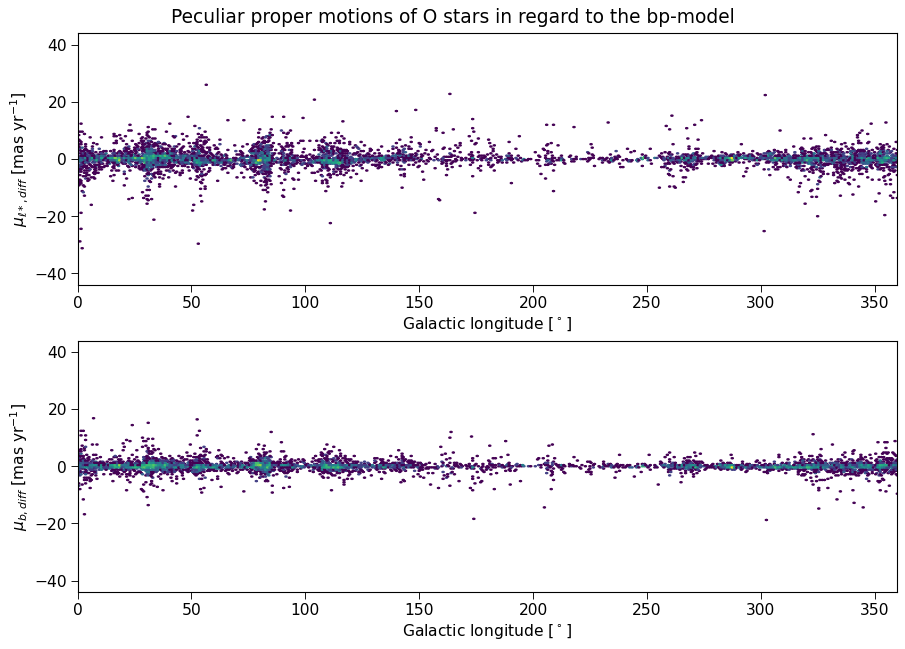

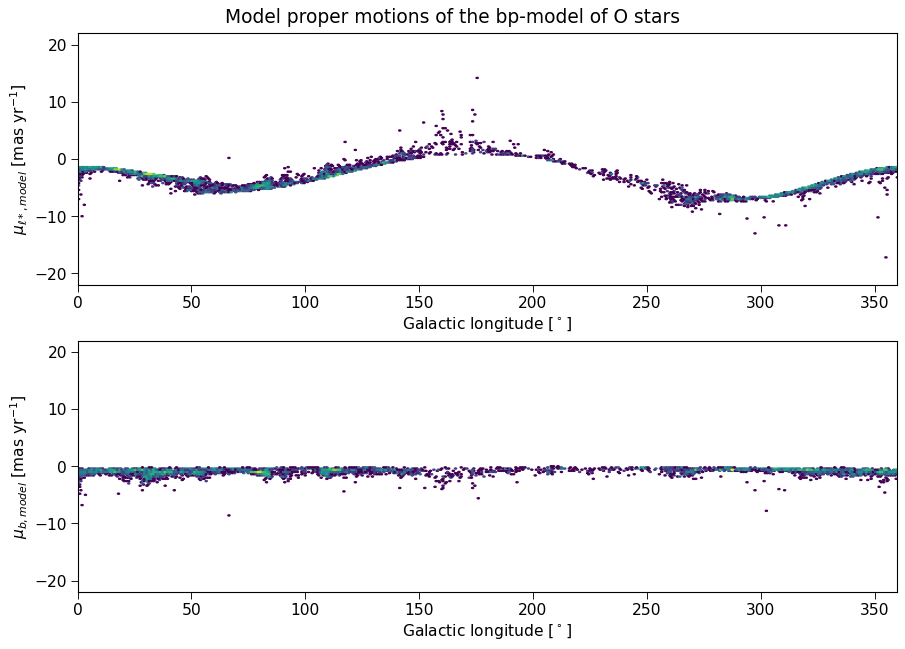

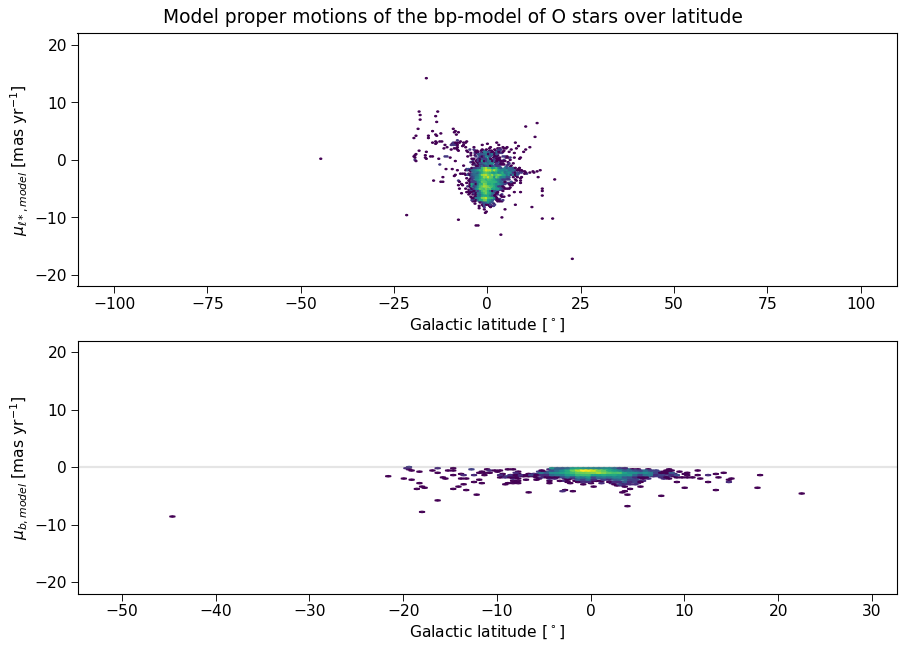

In [15]:
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of O stars in regard to the bp-model")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], pml_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

# plt.savefig('img2/pml_diff-pmb_diff-vs-galon_BP_O.png')

# Model
fig2=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig2)
plt.suptitle("Model proper motions of the bp-model of O stars")
ax_lmul = fig2.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'][sample_filter], pml_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*, model}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig2.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['l'][sample_filter], pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-20,20])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, model}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)

# plt.savefig('img2/pml_model-pmb_model-vs-galon_BP_O.png')

fig3=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig3)
plt.suptitle("Model proper motions of the bp-model of O stars over latitude")
ax_lmul = fig3.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['b'][sample_filter], pml_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(obatable['b'])-10,np.max(obatable['b'])+10,-20,20])
ax_lmul.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*, model}$ [mas yr$^{-1}$]')

ax_lmub = fig3.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(obatable['b'][sample_filter], pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(obatable['b'])-10,np.max(obatable['b'])+10,-20,20])
ax_lmub.set_xlabel(r'Galactic latitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, model}$ [mas yr$^{-1}$]')
plt.plot([np.min(obatable['b'][sample_filter])-10,np.max(obatable['b'][sample_filter])+10], [0,0], c='gray', alpha = 0.2)
ax_lmub.set_xlim([np.min(obatable['b'][sample_filter])-10,np.max(obatable['b'][sample_filter])+10])
plt.show()

# plt.savefig('img2/pml_model-pmb_model-vs-galat_BP_O.png')

### Plotting the model peculiar proper motions in l and b againts eachother for the entire sample

Text(0.5, 0, '$v_{\\ell*}$ [km s$^{-1}$]')

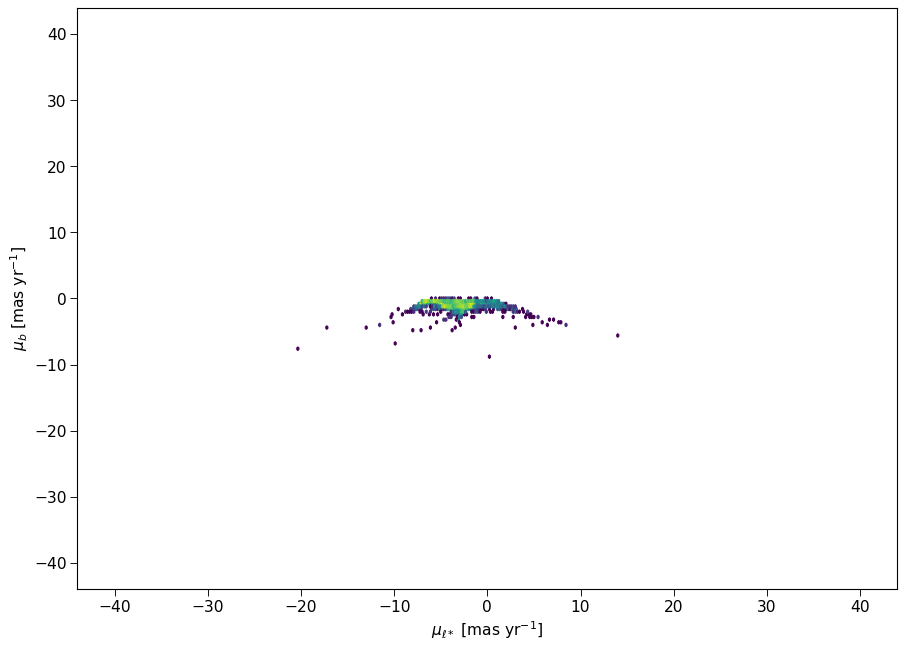

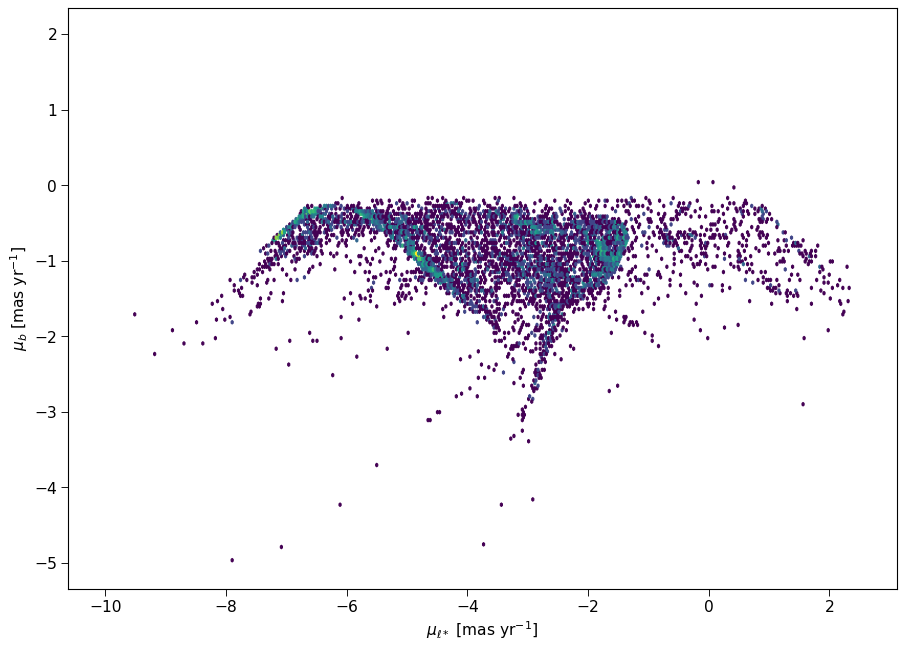

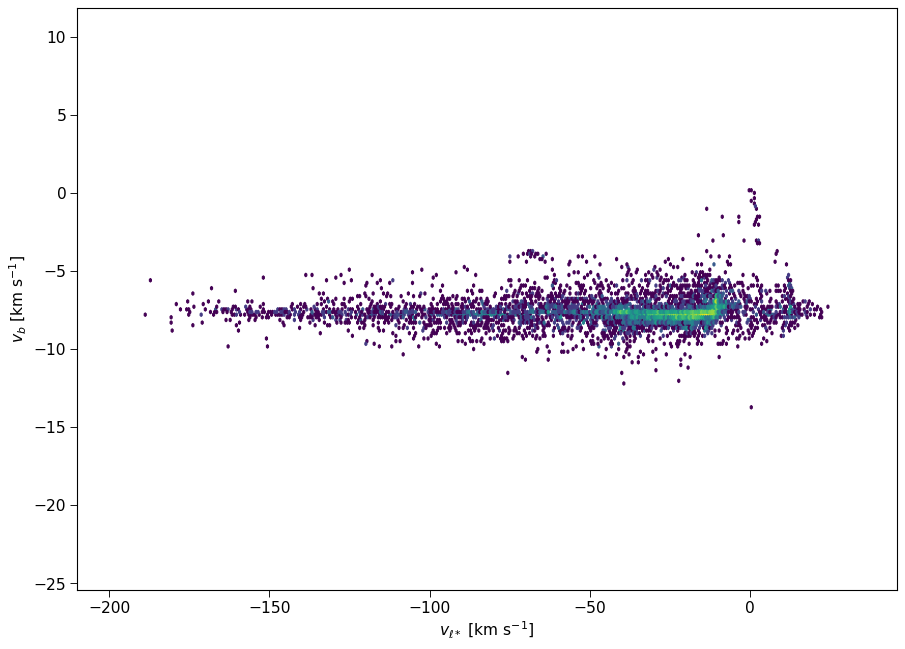

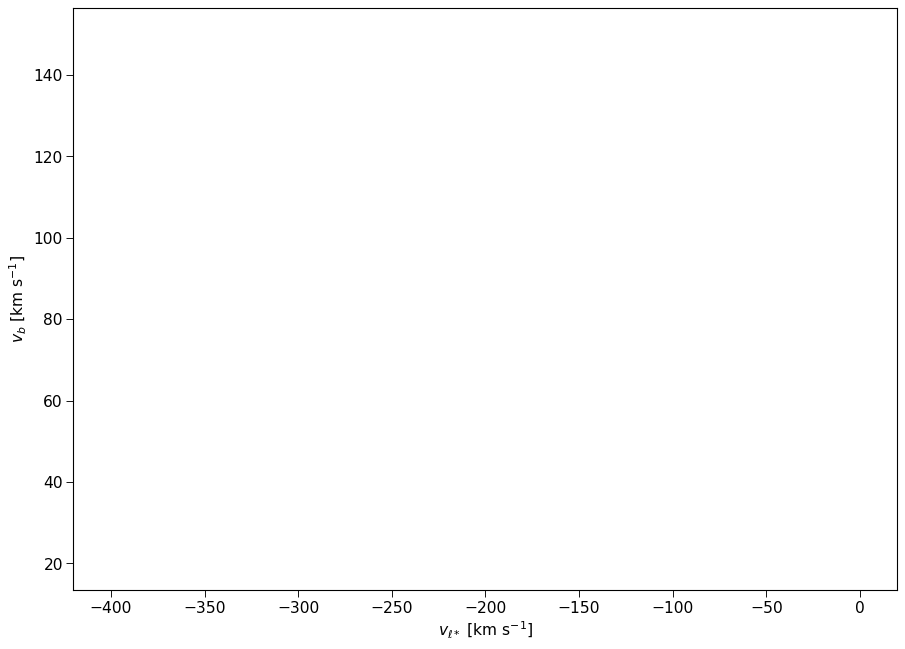

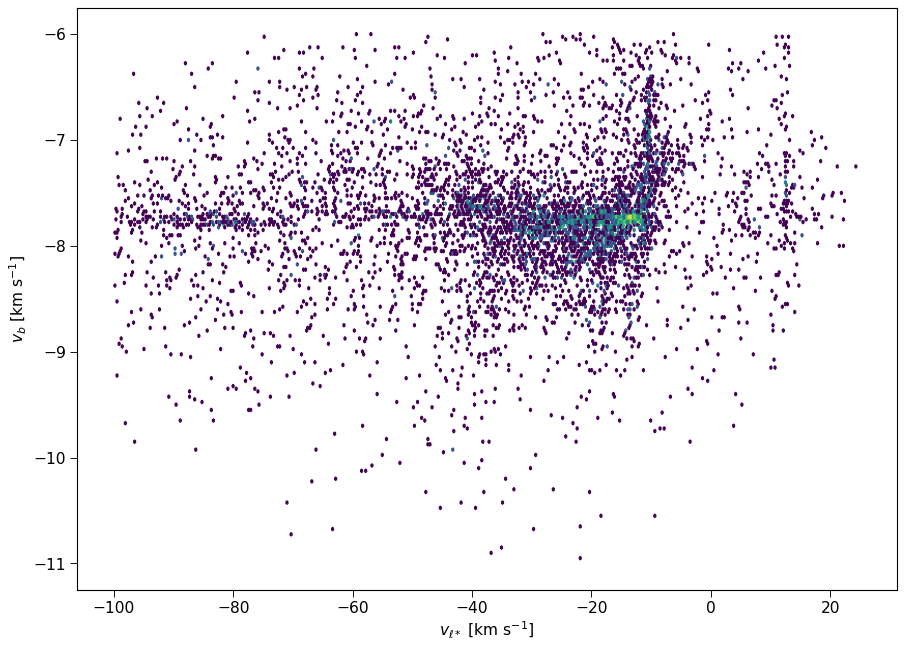

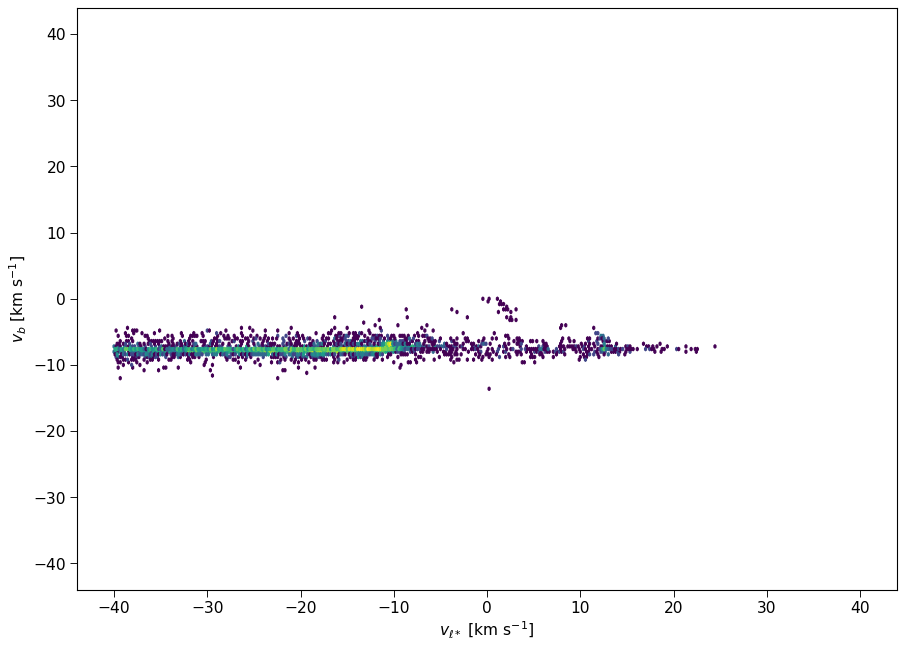

In [16]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_model, pmb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-10,2.5,-5,2])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')


vl_model = A/plx * pml_model
vb_model = A/plx * pmb_model


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(vl_model.value)-10,np.max(vl_model.value)+10,np.min(vb_model.value)-10,np.max(vb_model.value)+10])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-400, 0, 20,150])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-100,25,-11,-6])
ax_vlb.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')


# Same axes as Zari uses:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)

ax_vlb_zariax = fig.add_subplot(gs[0,0])
# ax_lmulb.scatter(pml_model, pmb_model, marker='.', alpha = 1, c='orange')

im_vlb_zariax = ax_vlb_zariax.hexbin(vl_model, vb_model, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_vlb_zariax.set_ylabel(r'$v_b$ [km s$^{-1}$]')
ax_vlb_zariax.set_xlabel(r'$v_{\ell*}$ [km s$^{-1}$]')
# ax_vlb.set_xlim(-40, 40)
# ax_vlb.set_ylim(-40, 40)

# A look at the tangential velocities

Text(0.5, 0, '$v_{\\ell*, pec}$ [km s$^{-1}$]')

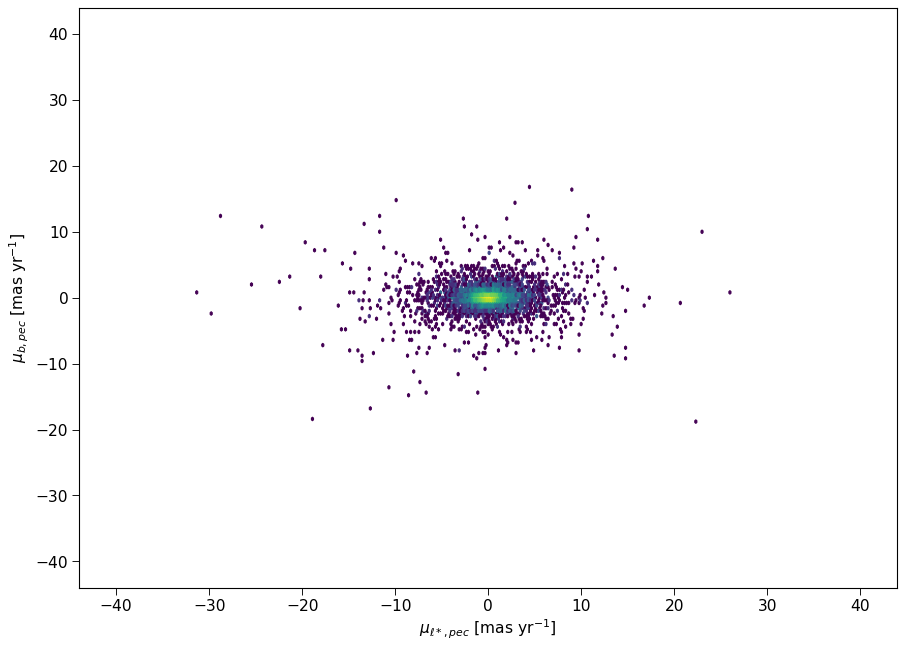

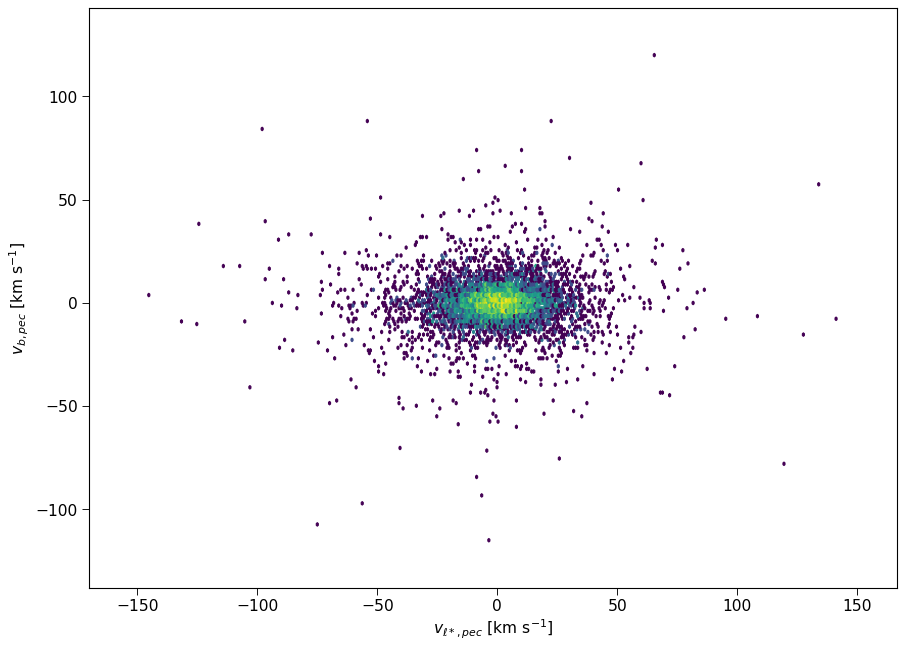

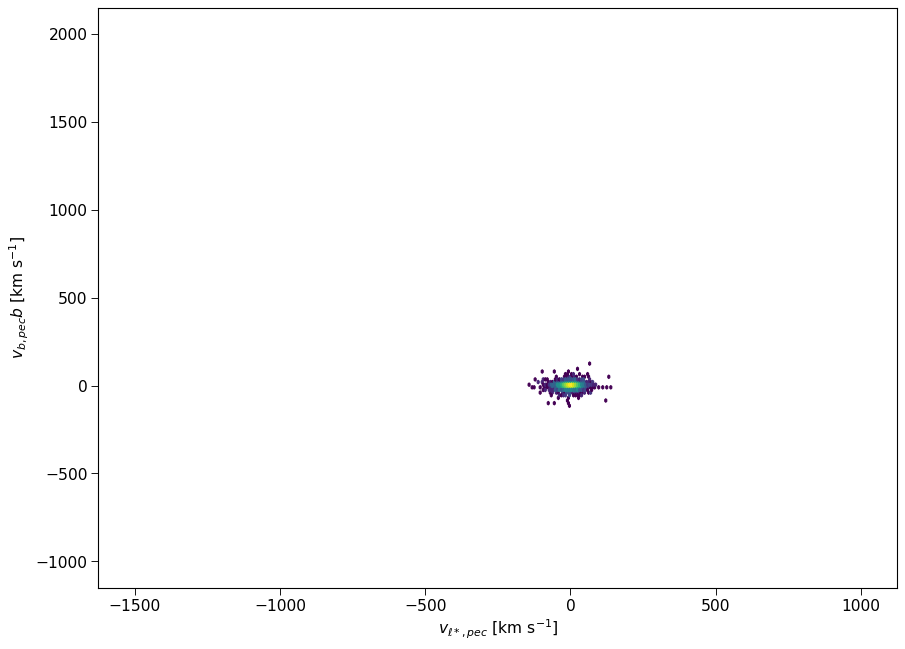

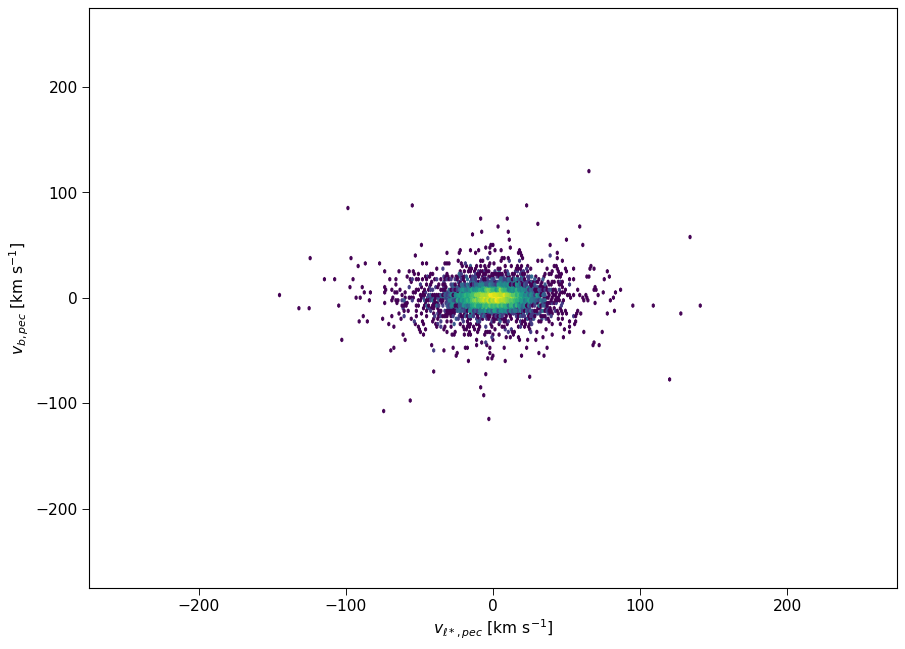

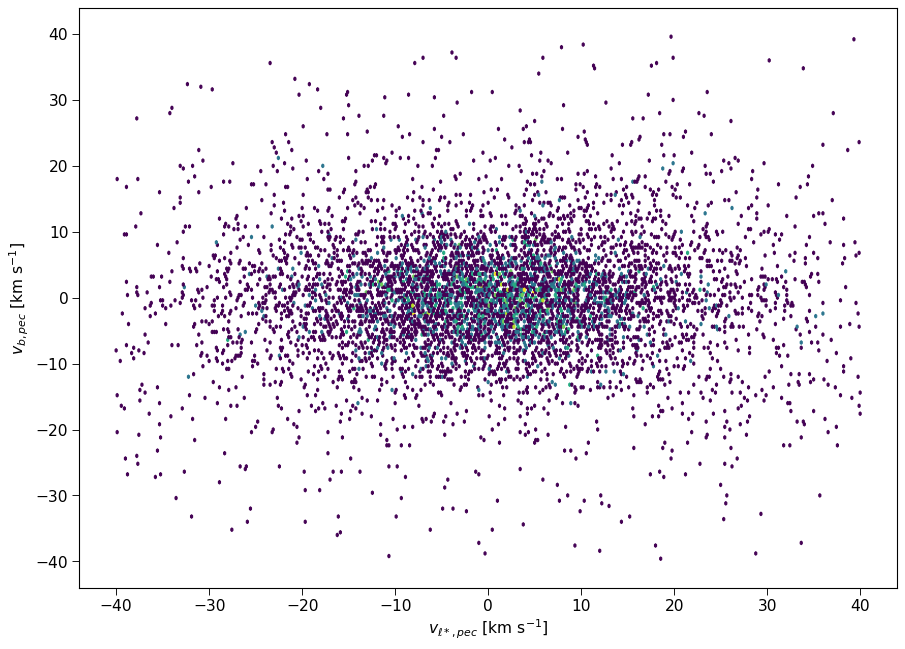

In [17]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_diff, pmb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')


vl_model = A/plx * pml_model
vb_model = A/plx * pmb_model

vl_diff = A/plx * pml_diff
vb_diff = A/plx * pmb_diff


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[np.min(vl_diff)-10,np.max(vl_diff)+10,np.min(vb_diff)-10,np.max(vb_diff)+10])
ax_vlb.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-1500, 1000, -1000, 2000])
ax_vlb.set_ylabel(r'$v_{b, pec}b$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-250,250,-250,250])
ax_vlb.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')


# Same axes as Zari uses:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb_zariax = fig.add_subplot(gs[0,0])
im_vlb_zariax = ax_vlb_zariax.hexbin(vl_diff, vb_diff, 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_vlb_zariax.set_ylabel(r'$v_{b, pec}$ [km s$^{-1}$]')
ax_vlb_zariax.set_xlabel(r'$v_{\ell*, pec}$ [km s$^{-1}$]')

### Peculiar velocities versus longitudes

Text(0.5, 1.0, 'Peculiar velocities in latitude for O stars with the BP-model')

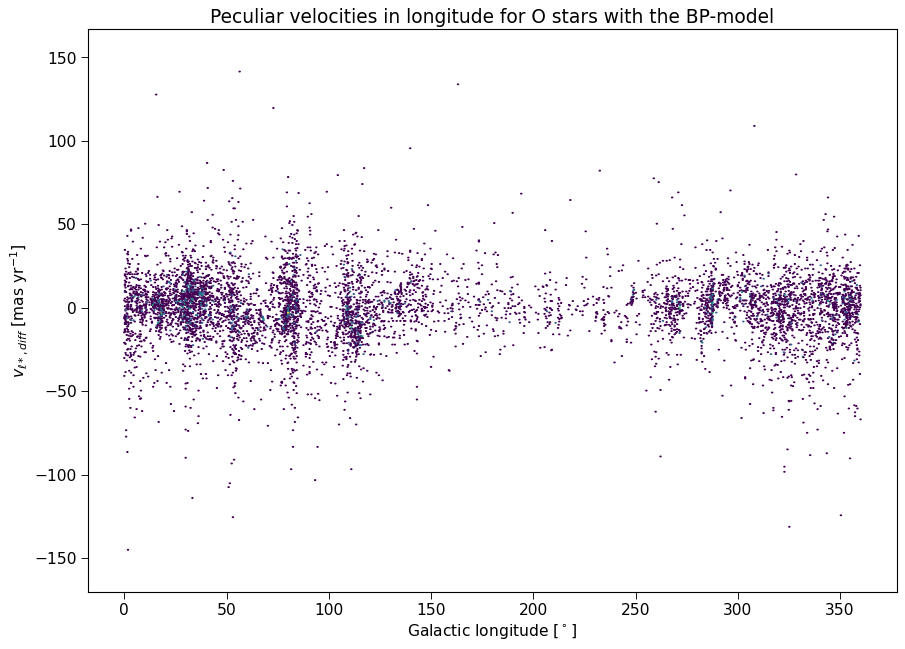

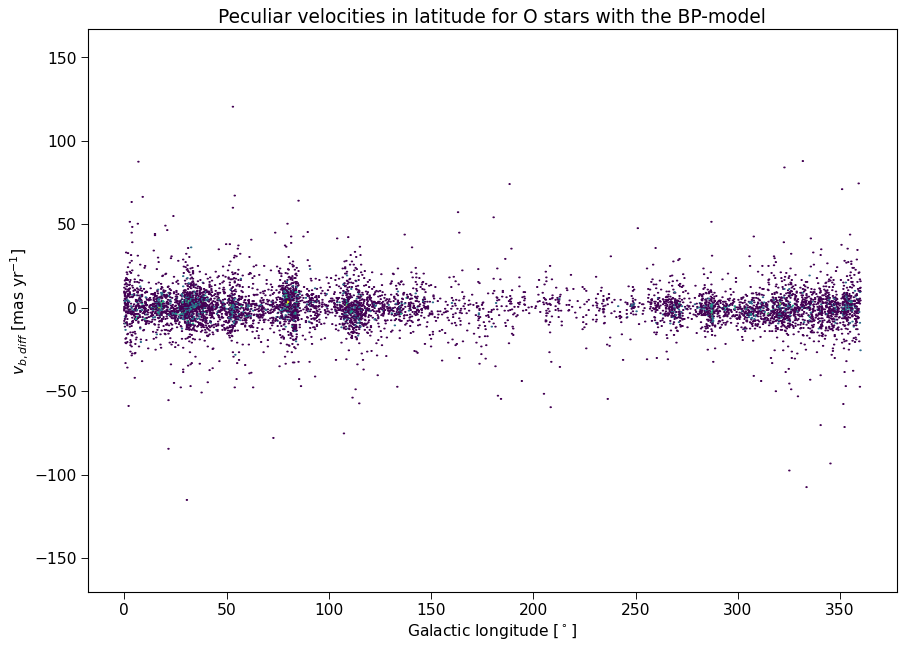

In [18]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(galon, vl_diff, 
                         gridsize=[600,400], mincnt=1, bins='log', extent=[0, 360, np.min(vl_diff)-10,np.max(vl_diff)+10])
ax_vlb.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_vlb.set_ylabel(r'$v_{\ell*,diff}$ [mas yr$^{-1}$]')

plt.title('Peculiar velocities in longitude for O stars with the BP-model')
# plt.savefig('img2/v_pec_lon-vs-galon_BP_O.png')

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_vlb = fig.add_subplot(gs[0,0])
im_vlb = ax_vlb.hexbin(galon, vb_diff, 
                         gridsize=[600,400], mincnt=1, bins='log', extent=[0, 360, np.min(vl_diff)-10,np.max(vl_diff)+10])
ax_vlb.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_vlb.set_ylabel(r'$v_{b,diff}$ [mas yr$^{-1}$]')

plt.title('Peculiar velocities in latitude for O stars with the BP-model')
# plt.savefig('img2/v_pec_lat-vs-galon_BP_O.png')

### Replicating runaway figure from Zari book
Using Zari's selection process, but instead of using vl_pec = vl - mean(vl) I use vl_pec = vl - vl_model

In [19]:
def histogram_values(data, bins):
    """
    This function counts the number of datapoints in each bin for a histogram.
    This is not done via np.histogram, because this way the count values can be
    scaled.
    """
    bin_counts = np.zeros(len(bins)-1)
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        if right_edge != bins[-1]:
            masked_data_1 = data[data>=left_edge]
            masked_data = masked_data_1[masked_data_1<right_edge]
        else:
            masked_data_1 = data[data>=left_edge]
            masked_data = masked_data_1[masked_data_1<=right_edge]
        bin_counts[i] = len(masked_data)
    return bin_counts


def histogram_values_improved(data, bins):
    bin_counts = np.zeros(len(bins)-1)
#     print("A:", np.arange(len(bins)-1))
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        if right_edge != bins[-1]:
            masked_index = np.argwhere((data >= left_edge) & (data < right_edge))
        else:
            masked_index = np.argwhere((data >= left_edge) & (data <= right_edge))
#         print(i, masked_index)
        bin_counts[i] = len(masked_index)
    return bin_counts


def hist_plotter(values, bins, loglog=False, labelname = None):
    """
    This function plots the values created by histogram_values(). Before 
    plotting the values are divided by the binwidth of their bin. Inner edges
    are added twice to x_plot_list, because plt.plot will draw a horizontal line
    between the two edges and a vertical line to the second value for the same
    edge.
    """
    x_plot_list = []
    y_plot_list = []
    for i in np.arange(len(bins)-1):
        left_edge = bins[i]
        right_edge = bins[i+1]
        x_plot_list.append(left_edge)
        x_plot_list.append(right_edge)
        binwidth = right_edge-left_edge
        y_plot_list.append(values[i])
        y_plot_list.append(values[i])
    if loglog == False:
        plt.plot(x_plot_list, y_plot_list, label=labelname)
    if loglog == True:
        plt.loglog(x_plot_list, y_plot_list, label=labelname)
    return

### Selecting the runaway stars.

Quantiles:
90%: 2.9254197700988187
91%: 3.065480559517492
95%: 3.9768198441144453


(0.0, 907.0)

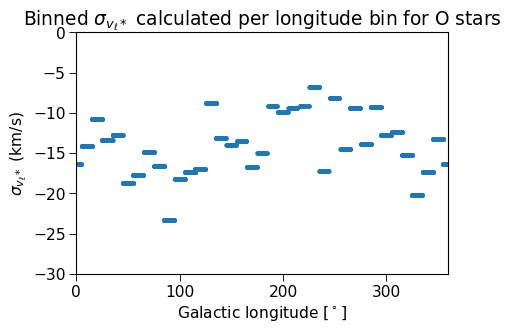

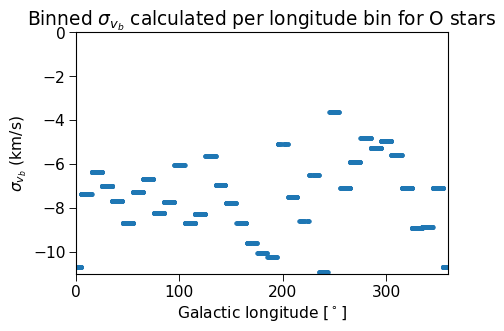

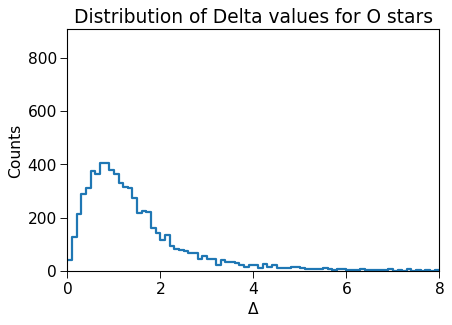

In [20]:
vl = A/plx * prop_mot_lon
vb = A/plx * prop_mot_lat

lon_binedges = np.append(np.array(355), np.linspace(5,355, 36)) # Gaat dit zo goed?
bin_centers = np.linspace(0, 35, 36)
binned_indices = np.zeros(36, dtype=np.ndarray)
binned_sigm = np.zeros(36, dtype=float)
all_vl_sigm = np.zeros(vl.shape)
all_vb_sigm = np.zeros(vb.shape)
Delta = np.zeros(vl.shape)

for i in np.arange(len(lon_binedges)-1):
    left_edge = lon_binedges[i]
    right_edge = lon_binedges[i+1]
    if i == 0:
        masked_index = np.argwhere((galon.value >= left_edge) | (galon.value < right_edge))
    else:
        masked_index = np.argwhere((galon.value >= left_edge) & (galon.value < right_edge))
    binned_indices[i] = masked_index
    vl_bin = vl_diff[masked_index]
    vb_bin = vb_diff[masked_index]
    all_vl_sigm[masked_index] = 0.5*(np.quantile(vl_bin, 0.16) - np.quantile(vl_bin, 0.84))
    all_vb_sigm[masked_index] = 0.5*(np.quantile(vb_bin, 0.16) - np.quantile(vb_bin, 0.84))

    Delta[masked_index] = np.sqrt((vl_diff[masked_index]/all_vl_sigm[masked_index])**2 + \
                                  (vb_diff[masked_index]/all_vb_sigm[masked_index])**2)

# Delta_cutoff = 8

counts = histogram_values_improved(Delta, bins=np.linspace(0, 50, 501))

print("Quantiles:")
print("90%:", np.quantile(Delta, 0.90))
print("91%:", np.quantile(Delta, 0.91))
print("95%:", np.quantile(Delta, 0.95))

#np.arange(len(all_sigm))

plt.figure()
plt.title(r"Binned $\sigma_{v_\ell*}$ calculated per longitude bin for O stars")
plt.scatter(galon, all_vl_sigm, marker='.')
plt.xlabel(r'Galactic longitude [$^\circ$]')
plt.ylabel(r'$\sigma_{v_\ell*}$ (km/s)')
plt.xlim(0, 360)
plt.ylim(-30, 0)
# plt.savefig('img2/sigmavl_BP_O.png')

plt.figure()
plt.title(r"Binned $\sigma_{v_b}$ calculated per longitude bin for O stars")
plt.scatter(galon, all_vb_sigm, marker='.')
plt.xlabel(r'Galactic longitude [$^\circ$]')
plt.ylabel(r'$\sigma_{v_b}$ (km/s)')
plt.xlim(0, 360)
plt.ylim(-11, 0)
# plt.savefig('img2/sigmavb_BP_O.png')

plt.figure()
plt.title("Distribution of Delta values for O stars")
hist_plotter(counts, np.linspace(0, 50, 501))
plt.xlabel(r'$\Delta$')
plt.ylabel('Counts')
plt.xlim(0, 8)
plt.ylim(0, np.max(counts)+500)
# plt.savefig('img2/Deltadistr_BP_O.png')

In [21]:
print(len(sample_filter))
print(len(prop_mot_lon))
print(len(plx))

3023388
6952
6952


Zari selects roughly the 95% quantile as cutoff for runaway stars. So for now I do the same. (Zari uses delta_cutoff = 3, but for me this lies around 7. For me a value of 3 for Delta gives the quantile of around 90%). This discrepency is because of the wrong implementation of sigma. I still have to fix this.

## Visualizing the peculiar tangential velocities

In [22]:
Delta_cutoff = np.quantile(Delta, 0.98)
Runaway_mask = Delta > Delta_cutoff
pml_runaway = prop_mot_lon[Runaway_mask]
pmb_runaway = prop_mot_lat[Runaway_mask]
vl_runaway = vl[Runaway_mask]
vb_runaway = vb[Runaway_mask]
l_filtered = obatable['l'][sample_filter]
b_filtered = obatable['b'][sample_filter]
pml_diff_filtered = pml_diff  # [sample_filter]
pmb_diff_filtered = pmb_diff  # [sample_filter]
prop_mot_lon_filtered = prop_mot_lon  # [sample_filter]
prop_mot_lat_filtered = prop_mot_lat  # [sample_filter]
vl_diff_filtered = vl_diff  # [sample_filter]
vb_diff_filtered = vb_diff  # [sample_filter]

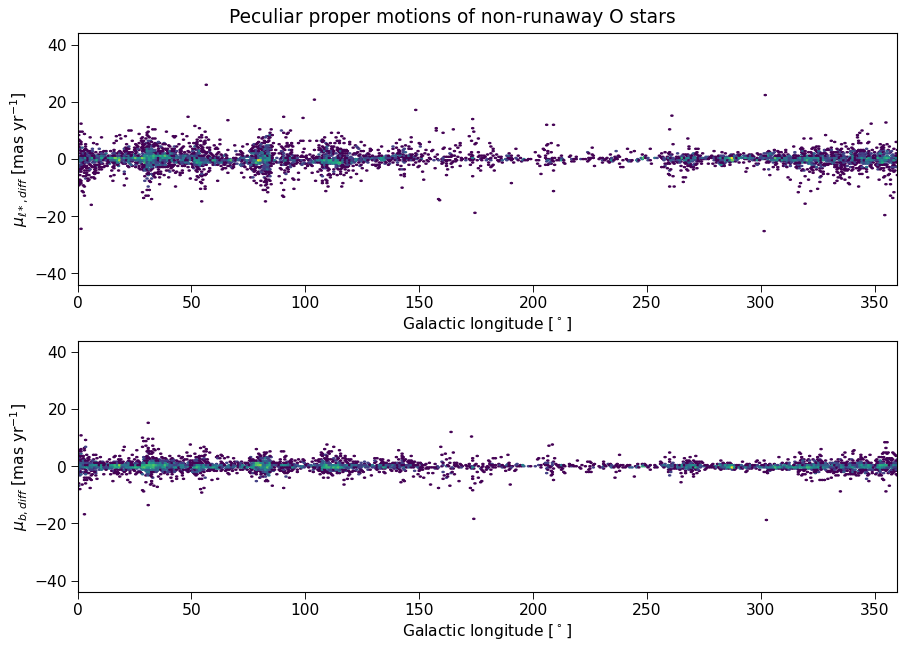

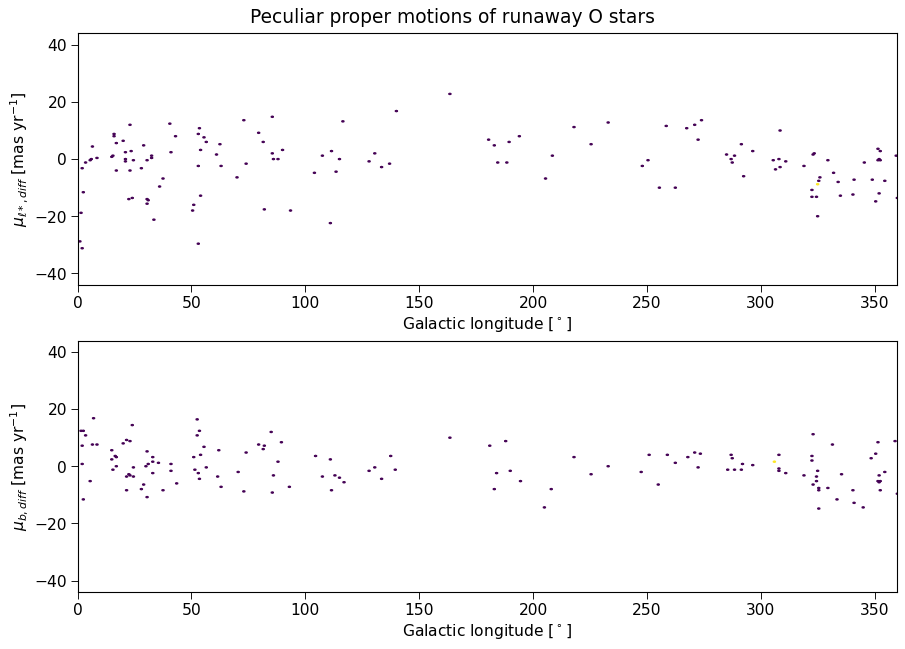

In [23]:
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of non-runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[~Runaway_mask], pml_diff_filtered[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
# im_lmul = ax_lmul.hexbin(obatable['l'][Runaway_mask], pml_diff[Runaway_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40], cmap='copper', alpha = 0.4)
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[~Runaway_mask], pmb_diff_filtered[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
# im_lmub = ax_lmub.hexbin(obatable['l'][Runaway_mask], pmb_diff[Runaway_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40], cmap='copper', alpha = 0.4)
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
plt.savefig('img2/nonrunaway_pm_BP_O.png')

fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Peculiar proper motions of runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[Runaway_mask], pml_diff_filtered[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$\mu_{\ell*,diff}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask], pmb_diff_filtered[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-40,40])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$\mu_{b, diff}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
plt.savefig('img2/runaway_pm_BP_O.png')

### Creating lines for fixed distances

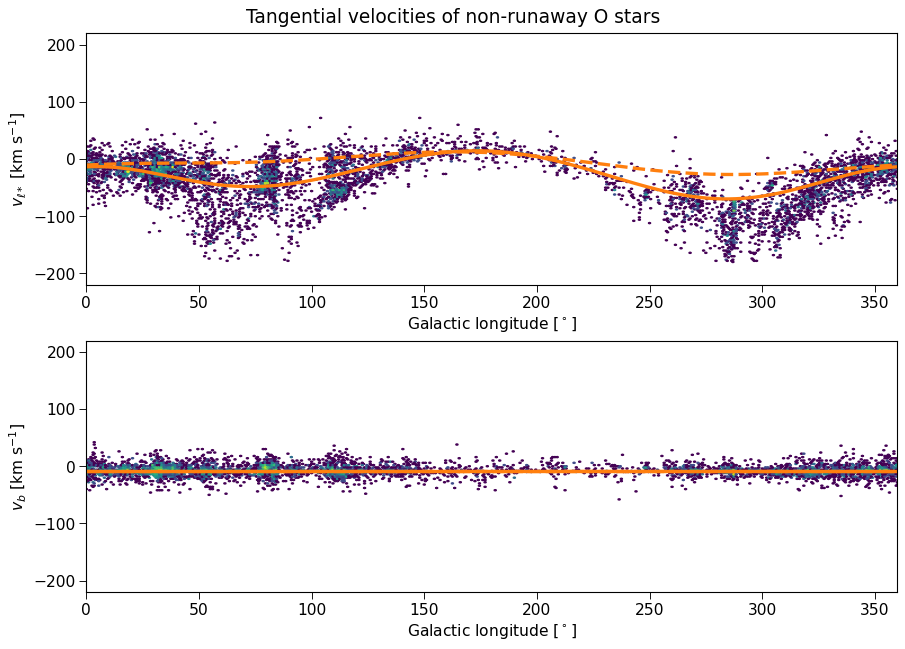

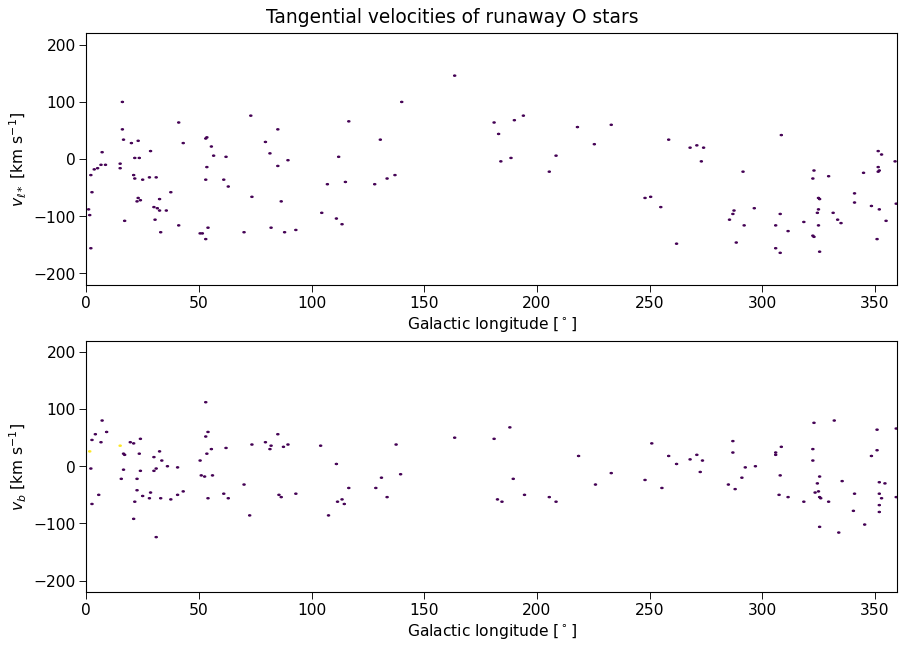

In [24]:
A = 4.74047  # km s^-1 yr
galon_fake = np.linspace(0,360,361)*u.deg
distance_500 = np.zeros_like(galon_fake.value) + 500*u.pc
galat_fake = np.zeros_like(galon_fake.value) - np.rad2deg(np.arcsin(zsun.value/500))*u.deg
pml_model_500, pmb_model_500, vrad_model_500 = diskmodel_best.observables(distance_500, galon_fake, galat_fake)

galat_fake = np.zeros_like(galon_fake.value) - np.rad2deg(np.arcsin(zsun.value/2000))*u.deg
distance_2000 = np.zeros_like(galon_fake.value) + 2000*u.pc
pml_model_2000, pmb_model_2000, vrad_model_2000 = diskmodel_best.observables(distance_2000, galon_fake, galat_fake)

vl_model_500 = A * distance_500/1000 * pml_model_500
vb_model_500 = A * distance_500/1000 * pmb_model_500
vl_model_2000 = A * distance_2000/1000 * pml_model_2000
vb_model_2000 = A * distance_2000/1000 * pmb_model_2000


fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Tangential velocities of non-runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[~Runaway_mask], vl[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.plot(galon_fake, vl_model_500, '--C1', lw=3, label=rf'$d={dist:.0f}$ pc')
ax_lmul.plot(galon_fake, vl_model_2000, '-C1', lw=3, label=rf'$d={dist:.0f}$ pc')
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*}$ [km s$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[~Runaway_mask], vb[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.plot(galon_fake, vb_model_500, '--C1', lw=3, label=rf'$d={dist:.0f}$ pc')
ax_lmub.plot(galon_fake, vb_model_2000, '-C1', lw=3, label=rf'$d={dist:.0f}$ pc')
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b}$ [km s$^{-1}$]')
ax_lmub.set_xlim(0,360)
plt.savefig('img2/nonrunaway_vt_BP_O.png')

fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Tangential velocities of runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[Runaway_mask], vl[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*}$ [km s$^{-1}$]')
ax_lmul.set_xlim(0,360)

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask], vb[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b}$ [km s$^{-1}$]')
ax_lmub.set_xlim(0,360)
plt.savefig('img2/runaway_vt_BP_O.png')

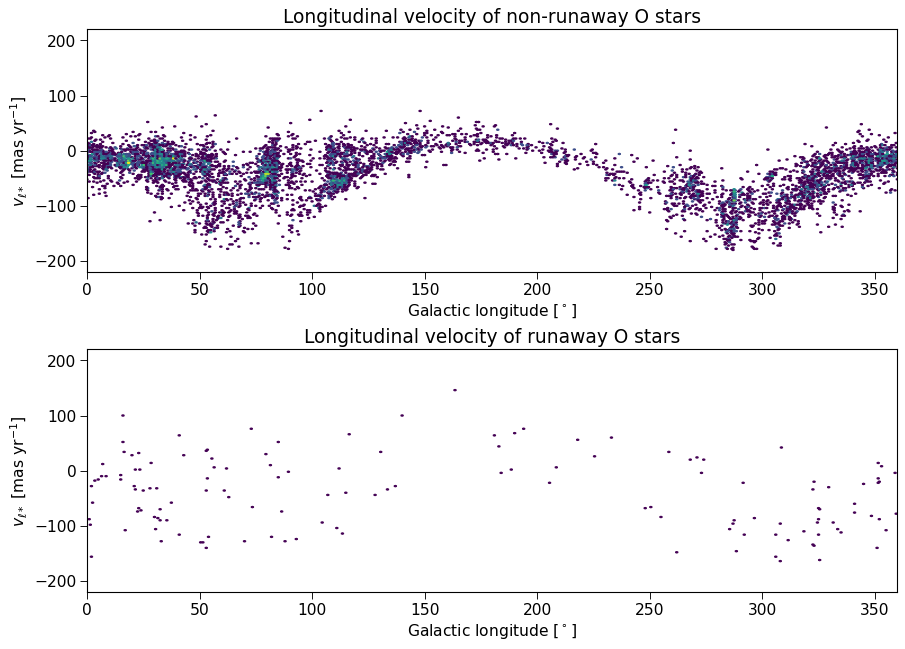

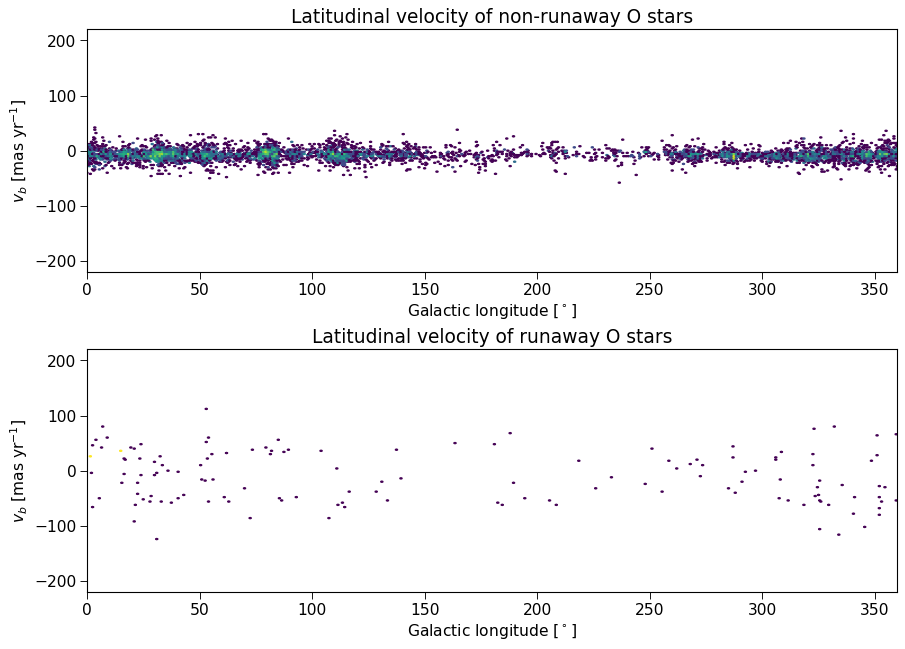

In [25]:
# vl, vb, vl_diff, vb_diff
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
# fig1.suptitle("Peculiar proper motions of non-runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[~Runaway_mask], vl[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title('Longitudinal velocity of non-runaway O stars')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask], vl[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{\ell*}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title('Longitudinal velocity of runaway O stars')
plt.savefig('img2/non_and_runaway_vl_BP_O.png')

# Kan hetzelfde doen voor v_rad!!! #########################################################################################

# vl, vb, vl_diff, vb_diff
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
# fig1.suptitle("Peculiar proper motions of non-runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[~Runaway_mask], vb[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{b}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title('Latitudinal velocity of non-runaway O stars')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask], vb[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title('Latitudinal velocity of runaway O stars')
plt.savefig('img2/non_and_runaway_vb_BP_O.png')

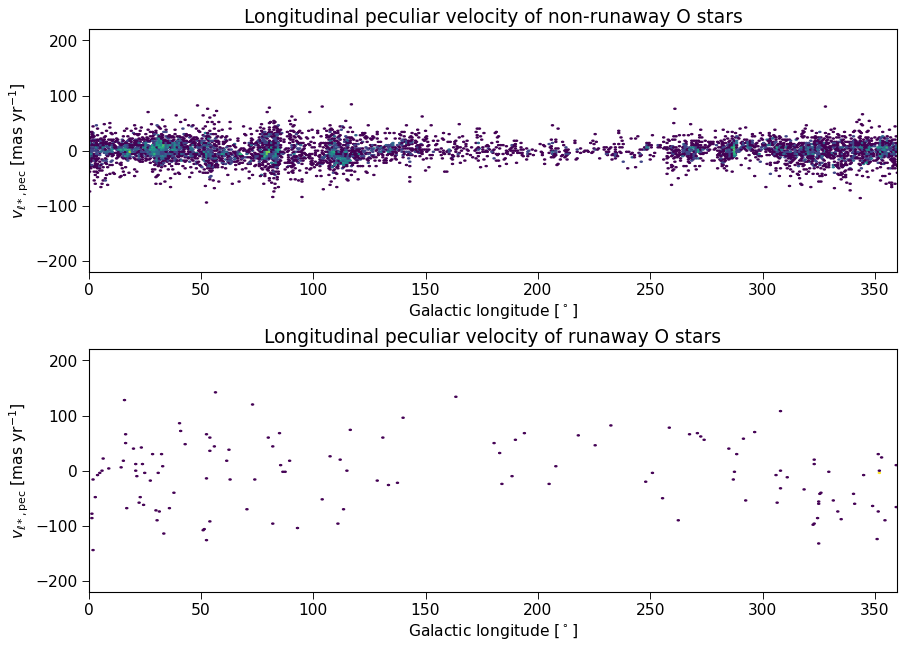

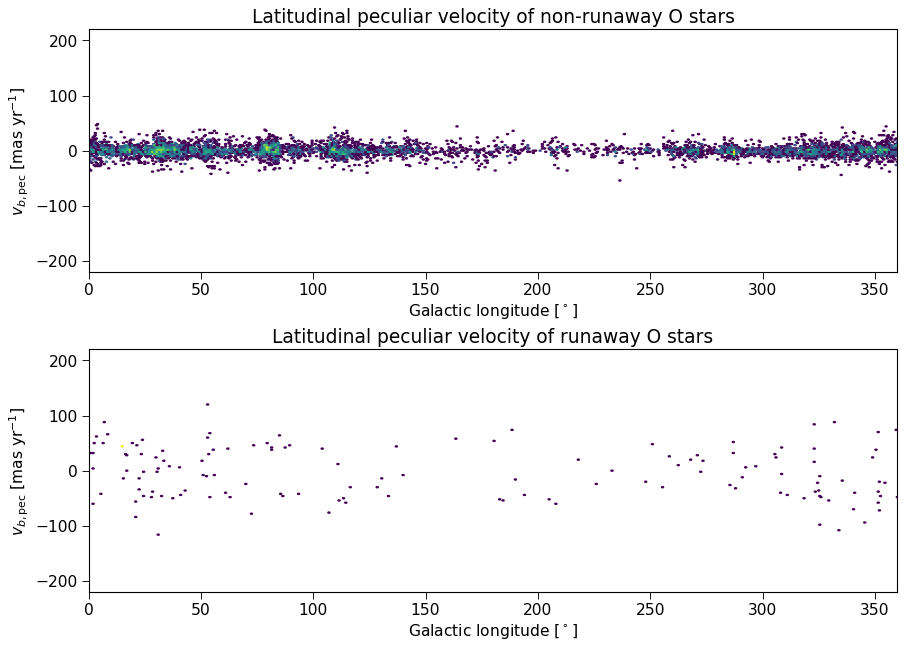

In [26]:
# vl, vb, vl_diff, vb_diff
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
# fig1.suptitle("Peculiar proper motions of non-runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[~Runaway_mask], vl_diff[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*,\mathrm{pec}}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title('Longitudinal peculiar velocity of non-runaway O stars')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask], vl_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{\ell*,\mathrm{pec}}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title('Longitudinal peculiar velocity of runaway O stars')
plt.savefig('img2/non_and_runaway_vlpec_BP_O.png')

# vl, vb, vl_diff, vb_diff
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
# fig1.suptitle("Peculiar proper motions of non-runaway O stars")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(l_filtered[~Runaway_mask], vb_diff[~Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{b,\mathrm{pec}}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title('Latitudinal peculiar velocity of non-runaway O stars')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask], vb_diff[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b,\mathrm{pec}}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title('Latitudinal peculiar velocity of runaway O stars')
plt.savefig('img2/non_and_runaway_vbpec_BP_O.png')

### Plotting peculiar proper motions of runaway stars and finding the MGCs in the data.

Text(0.5, 0, '$\\mu_{\\ell*}$ [mas yr$^{-1}$]')

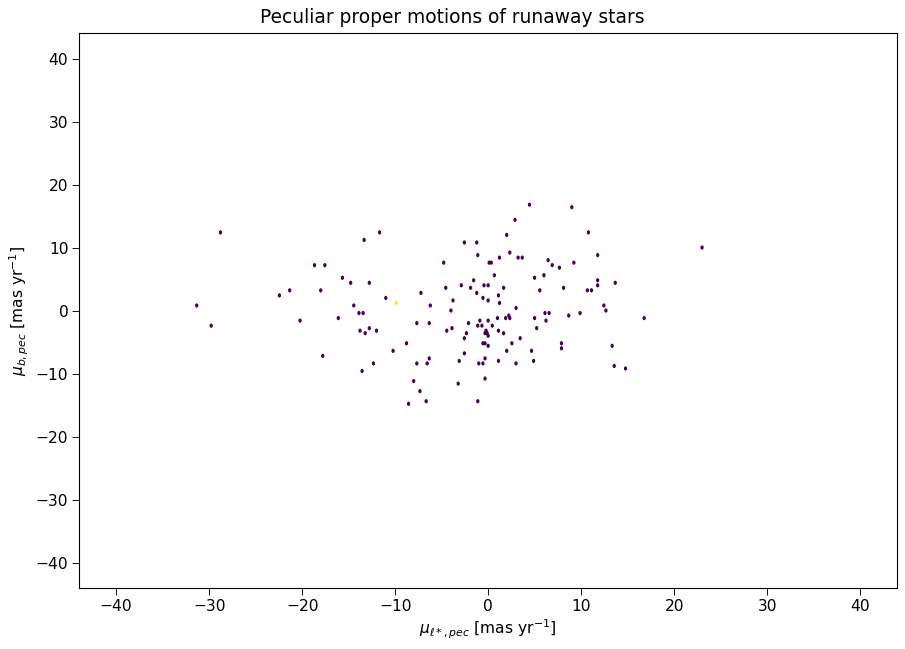

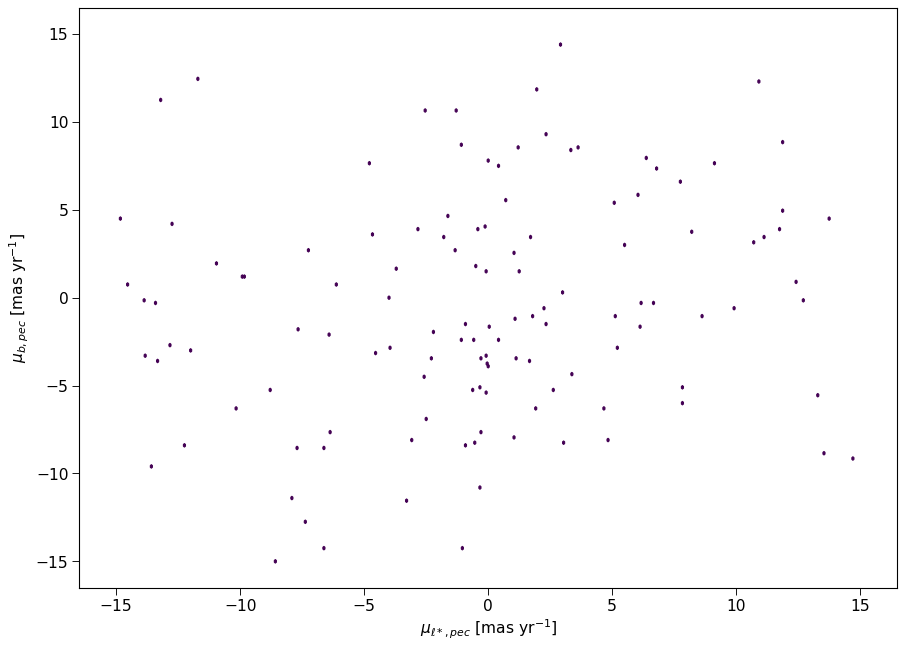

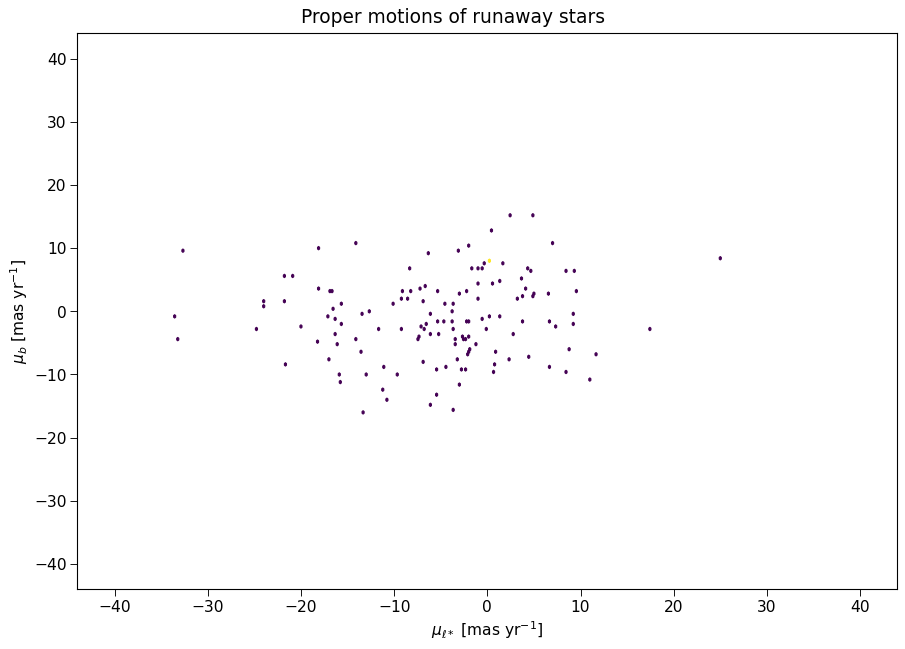

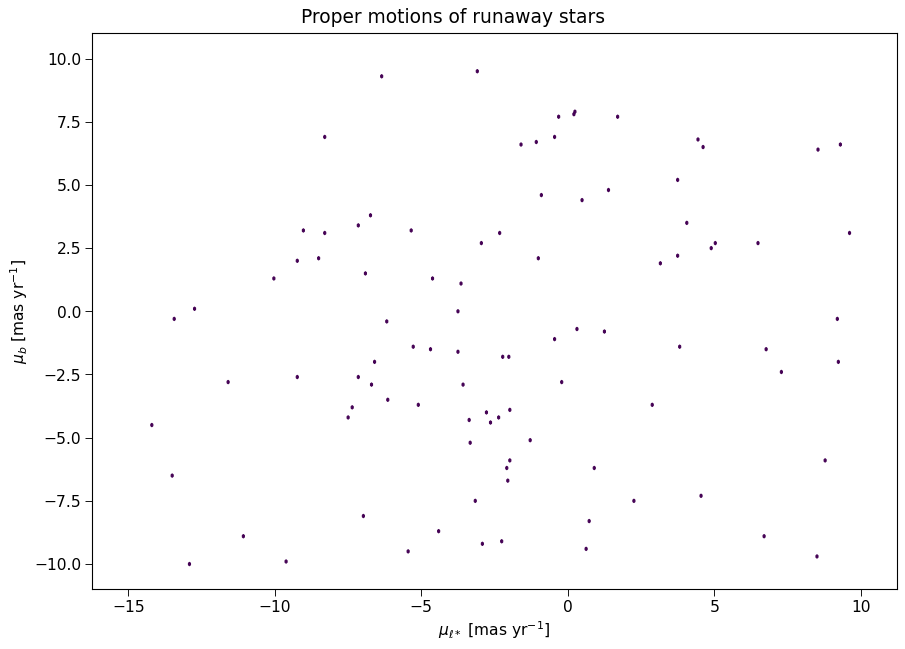

In [27]:
fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
plt.suptitle("Peculiar proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_diff_filtered[Runaway_mask], pmb_diff_filtered[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(pml_diff_filtered[Runaway_mask], pmb_diff_filtered[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-15,15,-15,15])
ax_mulb.set_ylabel(r'$\mu_{b, pec}$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*, pec}$ [mas yr$^{-1}$]')

############################################################################################################################

fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
plt.suptitle("Proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(prop_mot_lon_filtered[Runaway_mask], prop_mot_lat_filtered[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-40,40,-40,40])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')


fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(1, 1, figure=fig)
plt.suptitle("Proper motions of runaway stars")
ax_mulb = fig.add_subplot(gs[0,0])
im_mulb = ax_mulb.hexbin(prop_mot_lon_filtered[Runaway_mask], prop_mot_lat_filtered[Runaway_mask], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[-15,10,-10,10])
ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')



In [28]:
# #
# """
# DEZE NU NIET UITVOEREN, WANT DEZE VERDWIJNT MET HET NIEUWE FILTER!

# """

# fig=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
# gs = GridSpec(1, 1, figure=fig)

# plt.suptitle("Proper motions of runaway stars")
# ax_mulb = fig.add_subplot(gs[0,0])
# im_mulb = ax_mulb.hexbin(prop_mot_lon[Runaway_mask], prop_mot_lat[Runaway_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[-1.5,0,0,2.5])
# ax_mulb.set_ylabel(r'$\mu_b$ [mas yr$^{-1}$]')
# ax_mulb.set_xlabel(r'$\mu_{\ell*}$ [mas yr$^{-1}$]')


# # goi: 'group of interest'
# goi1_mask = (pml_runaway>-1.2) & (pml_runaway < -0.1) & (pmb_runaway < 2.3) & (pmb_runaway > 1)
# pml_runaway_goi1 = pml_runaway[goi1_mask]
# pmb_runaway_goi1 = pmb_runaway[goi1_mask]

# fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
# gs = GridSpec(2, 1, figure=fig1)
# fig1.suptitle("Galactical position of runaway stars of goi1")
# ax_lmul = fig1.add_subplot(gs[0,0])
# # im_lmul = ax_lmul.hexbin(obatable['l'][~Runaway_mask], obatable['b'][~Runaway_mask], 
# #                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-100,100])
# im_lmul = ax_lmul.hexbin(obatable['l'], obatable['b'], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-100,100])
# im_lmul = ax_lmul.hexbin(obatable['l'][Runaway_mask][goi1_mask], obatable['b'][Runaway_mask][goi1_mask], 
#                          gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-100,100], cmap='copper', alpha = 1)
# ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
# ax_lmul.set_ylabel(r'Galactic latitude [$^\circ$]')
# ax_lmul.set_xlim(0,360)


## Found holes of missing data in the raw obatable data

OBAtable comes straight from the fitsfile without processing.

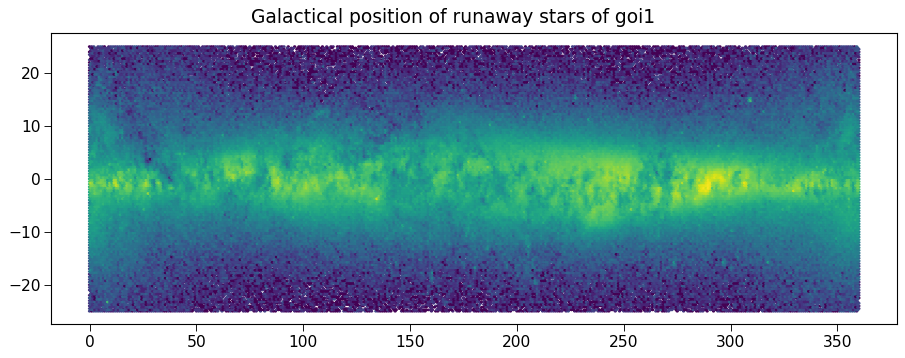

In [29]:


fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*10))
gs = GridSpec(2, 1, figure=fig1)
fig1.suptitle("Galactical position of runaway stars of goi1")
ax_lmul = fig1.add_subplot(gs[0,0])
im_lmul = ax_lmul.hexbin(obatable['l'], obatable['b'], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-25,25])

GOI1 probably contains the magellanic clouds

## Preparing dataset for TOPCAT

In [30]:
from astropy.io import fits

In [31]:
# selection_mask = [:int(len(galon)/2)]
# n_divide = 200

# Fit files work better with Topcat --> require less space! Kijken waarom dit nog niet werkt.
# TOPCAT_dataset = np.transpose(np.stack((galon[:int(len(galon)/n_divide)].value, galat[:int(len(galon)/n_divide)].value, plx[:int(len(galon)/n_divide)], prop_mot_lon[:int(len(galon)/n_divide)], prop_mot_lat[:int(len(galon)/n_divide)], vl[:int(len(galon)/n_divide)], vb[:int(len(galon)/n_divide)])))
# hdu = fits.PrimaryHDU(TOPCAT_dataset)
# hdul = fits.HDUList([hdu])
# hdul.writeto('processed_dataset1.fits', overwrite=True)

""" Voor toepassen filter:
random_numbers = np.random.rand(len(galon))
selection = random_numbers < 0.01

TOPCAT_dataset = np.transpose(np.stack((galon[selection].value, galat[selection].value, plx[selection], prop_mot_lon[selection], prop_mot_lat[selection], vl[selection], vb[selection], obatable['parallax_over_error'][selection])))

selection_with_plx = selection & plxfilter

TOPCAT_dataset_plx_filtered = np.transpose(np.stack((galon[selection_with_plx].value, galat[selection_with_plx].value, plx[selection_with_plx], prop_mot_lon[selection_with_plx], prop_mot_lat[selection_with_plx], vl[selection_with_plx], vb[selection_with_plx], vl_diff[selection_with_plx], vb_diff[selection_with_plx], Delta[selection_with_plx])))
"""
random_numbers = np.random.rand(len(galon))
selection = random_numbers < 0.01

TOPCAT_dataset = np.transpose(np.stack((galon[selection].value, galat[selection].value, plx[selection], prop_mot_lon[selection], prop_mot_lat[selection], vl[selection], vb[selection], obatable[sample_filter]['parallax_over_error'][selection])))


In [32]:
np.savetxt("processed_dataset_Final_O.csv", TOPCAT_dataset, delimiter=",")

## Creating a list of candidate outliers

Creating a mask for the outlier selection based on strong deviations from the mean tangential motion.

In [33]:
"""
# Earlier definitions:
Delta_cutoff = np.quantile(Delta, 0.95)
Runaway_mask = Delta > Delta_cutoff
pml_runaway = prop_mot_lon[Runaway_mask]
pmb_runaway = prop_mot_lat[Runaway_mask]
vl_runaway = vl[Runaway_mask]
vb_runaway = vb[Runaway_mask]
"""


#

# Delta_cutoff = np.quantile(Delta, 0.95)
Runaway_mask_1 = Delta > Delta_cutoff

#


# Kan ik pas afmaken als zeker is dat ik het juiste (of gebrek aan) filter gebruik!

# print(obatable)
# print(obatable['source_id'])
filtered_ids = obatable[sample_filter]['source_id'].tolist()

# Vallen deze sterren nu gewoon niet meer in de 5%, vanwege nieuw gevonden, groter uitschietende sterren?
# Deze sterren zitten wel in de gewone dataset, maar niet in de set na de OBA filter! Misschien door plx filter of een andere?
#   Zal dan wsl toch filters moeten weghalen!

print(len(obatable[sample_filter]['l']))
print(len(obatable[sample_filter][Runaway_mask_1]['l']))

6952
140


Creating a mask for the outlier selection based on high radial velocities, compared to the solar motion.

In [34]:
# print(obatable.colnames)
vrad = np.array(obatable['radial_velocity'][sample_filter].tolist())
vrad_error = np.array(obatable['radial_velocity_error'][sample_filter].tolist())

None_mask = vrad != None

sample_size = np.sum(sample_filter)
print(sample_size, 'stars in the sample.')

# vrad_diff_min_possible = vrad_diff[None_mask]-vrad_error[None_mask]
# print(len(vrad_min_possible[vrad_min_possible<0]))
# vrad_min_possible[vrad_min_possible<0] = 0
# print(len(vrad_min_possible[vrad_min_possible<0]))

# np.array(obatable['pml'][sample_filter].tolist())
vrad_diff = np.array(vrad[None_mask] - vrad_model[None_mask].value)
vrad_diff = vrad_diff.astype('float')

vrad_diff_min_possible = np.abs(vrad_diff)-vrad_error[None_mask]
print(len(vrad_diff_min_possible[vrad_diff_min_possible<0]))
vrad_diff_min_possible[vrad_diff_min_possible<0] = 0
print(len(np.array(vrad_diff_min_possible)[vrad_diff_min_possible<0]))
vrad_diff_min_possible = vrad_diff_min_possible.astype('float')

v_pec_total = np.sqrt(vl_diff[None_mask]**2 + vb_diff[None_mask]**2 + vrad_diff_min_possible**2)
Runaway_mask_2 = v_pec_total > 30
print(sum(None_mask), 'of these stars have radial velocity measurements.')
print(sum(Runaway_mask_2), 'of these stars have high enough total peculiar velocities to be assigned the runaway label.')
print(sum(Runaway_mask_1), 'stars are classified as runaway by the tangential velocity approach.')
print(sum(Runaway_mask_1[None_mask] & Runaway_mask_2), 'stars are labeled as runaway by both checks.')
print(sum(Runaway_mask_1[~None_mask]) + sum(Runaway_mask_1[None_mask] | Runaway_mask_2), 'of the sample stars are classified as runaways.')
print('This is ', float(sum(Runaway_mask_1[~None_mask]) + sum(Runaway_mask_1[None_mask] | Runaway_mask_2)) / float(sample_size)*100, '% of the stars.')

6952 stars in the sample.
238
0
1214 of these stars have radial velocity measurements.
562 of these stars have high enough total peculiar velocities to be assigned the runaway label.
140 stars are classified as runaway by the tangential velocity approach.
39 stars are labeled as runaway by both checks.
663 of the sample stars are classified as runaways.
This is  9.536823935558113 % of the stars.


Merging the two conditions and applying the filters

In [35]:
indices = np.arange(len(galon))
Runaway_indices = np.append(indices[~None_mask][Runaway_mask_1[~None_mask]], indices[None_mask][Runaway_mask_1[None_mask] | Runaway_mask_2] )
Final_runaway_mask = np.zeros(galon.shape, dtype=bool)
Final_runaway_mask[Runaway_indices] = True

In [36]:
# Creating the outliers file

Runaway_file = Table()
Runaway_file['source_id'] = np.array(obatable[sample_filter]['source_id'].tolist())[Final_runaway_mask]
print(Runaway_file)

     source_id     
-------------------
4266135013071852672
5313479796251809664
4266272623856721792
4266307258474597376
4266590073422392960
5313685950379559424
5540801213948711936
5959736653332427904
4267010533535881344
 148143287579346432
                ...
4260283618325281920
4057696741177726720
5254194988310454528
4264992994125326208
4057424238464484992
5952932222574082688
6053860307562309760
6053949574163550336
5953083779043584128
5953114294822473344
1827620665915997696
Length = 663 rows


In [37]:
filtered_ids = obatable[sample_filter]['source_id'].tolist()

runaway_ids = np.array(filtered_ids)[Final_runaway_mask]
# print(runaway_ids)
print(len(runaway_ids))
print(len(np.array(filtered_ids)[~Final_runaway_mask]))

# Runaways of Zari:
runaway_Zari_ids = np.array([390441943442220800, 2890122152481960576, 2083681294654108672, 3344576352924411136, 5195896888895916288,
                             6070376179105170048, 6639975875765813888, 455030486274102272, 3028075299444718080, 5895765142704352640,
                             2049168552364523520, 58850711337487616, 6099307559838681216, 2017735817073815680, 219375900005174272, 
                             2199904449710846720, 5927377029712024576, 5547952884262112256, 2249990571599168512, 6151098715037383552])
                            # Dit zijn runaways die èn in Zari èn in Hoogerwerf (StarHorse)zitten!


Zari_in_dataset_index = []
Both_runaway_index = []
for i in range(len(runaway_Zari_ids)):    
    Zari_in_dataset_index = np.append(Zari_in_dataset_index, np.argwhere( filtered_ids == runaway_Zari_ids[i] ) )
    Both_runaway_index = np.append(Both_runaway_index, np.argwhere( runaway_ids == runaway_Zari_ids[i] ) )
print("Number of Zari's stars in this dataset:", len(Zari_in_dataset_index))
print("Number of these stars that I have also identified as runaway stars:", len(Both_runaway_index))
print("These runaway stars have the following source id's:")
for i in range(len(Both_runaway_index)):
    print(runaway_ids[i])

663
6289
Number of Zari's stars in this dataset: 0
Number of these stars that I have also identified as runaway stars: 0
These runaway stars have the following source id's:


In [38]:
import winsound
frequency = 1000  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [39]:
# Delta_both_checks = Delta[Runaway_mask_1 & None_mask_rad]
# deltasort_indices = np.argsort(Delta)

index_masker = np.arange(len(None_mask))
index_masker = index_masker[None_mask]
extreme_vtot_filter = None_mask.copy()
extreme_vtot_filter[index_masker] = np.abs(v_pec_total> 500)
extreme_delta_filter = Delta > 20

extreme_runaway_filter = (extreme_vtot_filter | extreme_delta_filter)

filtered_ids = np.array(filtered_ids)
print('v_tot filter:', len(filtered_ids[extreme_vtot_filter]))
print('v_tan filter:', len(filtered_ids[extreme_delta_filter]))

double_source_ids = []
extreme_source_ids = filtered_ids[extreme_delta_filter].copy
for i in range(len(filtered_ids[extreme_vtot_filter])):
    double_found = False
    for j in range(len(filtered_ids[extreme_delta_filter])):
        if filtered_ids[extreme_vtot_filter][i] == filtered_ids[extreme_delta_filter][j]:
            double_found = True
            double_source_ids.append(filtered_ids[extreme_vtot_filter][i])
    if double_found == False:
        extreme_source_ids = np.append(extreme_source_ids, filtered_ids[extreme_vtot_filter][i])
            
print('# of source ids in both:', len(double_source_ids))
print(double_source_ids)

v_tot filter: 0
v_rad filter: 0
# of source ids in both: 0
[]


In [40]:
# print(len(l_filtered[~Runaway_mask_1 & ~None_mask]))
# print(len(l_filtered[~Runaway_mask_1 & None_mask]))
# print(len(Runaway_mask_2))
# print(len(l_filtered[~Runaway_mask_1 & None_mask][~Runaway_mask_2]))

print(len(l_filtered[~Runaway_mask_1 & ~None_mask]))
print(len(l_filtered[~Runaway_mask_1 & None_mask]))
# print(len(l_filtered[None_mask][~Runaway_mask_2] & ~Runaway_mask_1))
# print(len(l_filtered[None_mask][Runaway_mask_2]))
mask_ids = np.arange(len(None_mask))
mask_ids = mask_ids[None_mask]

None_mask_2 = None_mask.copy()
None_mask_2[mask_ids] = ~Runaway_mask_2

None_mask_rad = None_mask.copy()
None_mask_rad[mask_ids] = Runaway_mask_2


# Niet in mask 1 en niet in mask 2
print(len(np.append(l_filtered[~Runaway_mask_1 & ~None_mask], l_filtered[~Runaway_mask_1 & None_mask_2])))

# Niet in mask 1 en wel in mask 2
print(len(l_filtered[~Runaway_mask_1 & None_mask_rad]))

# Wel in mask 1 en niet in mask 2
print(len(l_filtered[Runaway_mask_1  & ~None_mask_rad]))

# In allebei
print(len(l_filtered[Runaway_mask_1 & None_mask_rad]))


# # Selectie die je wil hebben:
# # Niet in mask 1 en niet in mask 2
# print(len(np.append(l_filtered[~Runaway_mask_1 & ~None_mask], l_filtered[~Runaway_mask_1 & None_mask_2])))
print(" ")
print(399347+6454+18918+2440)
print(len(l_filtered))

5637
1175
6289
523
101
39
 
427159
6952


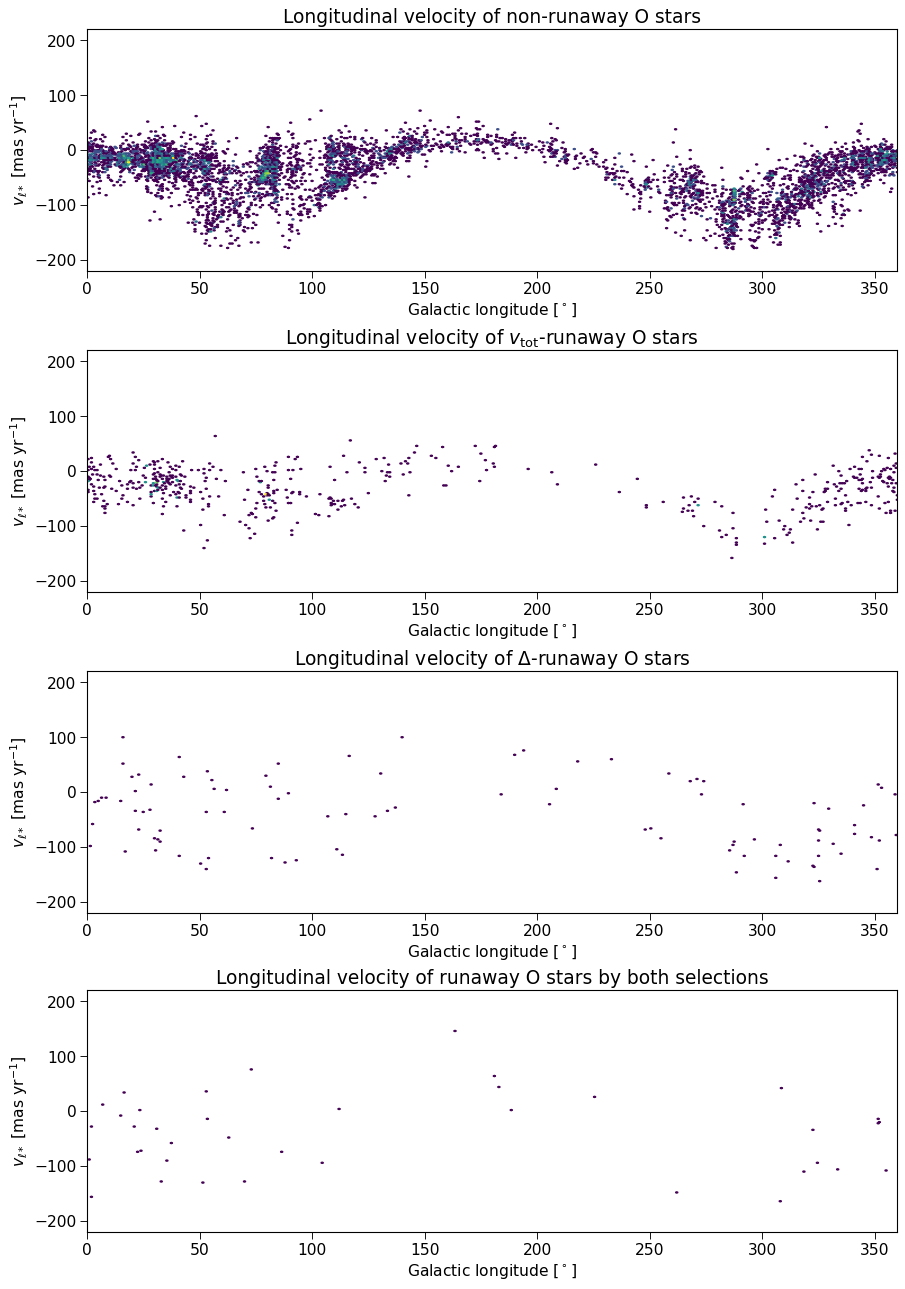

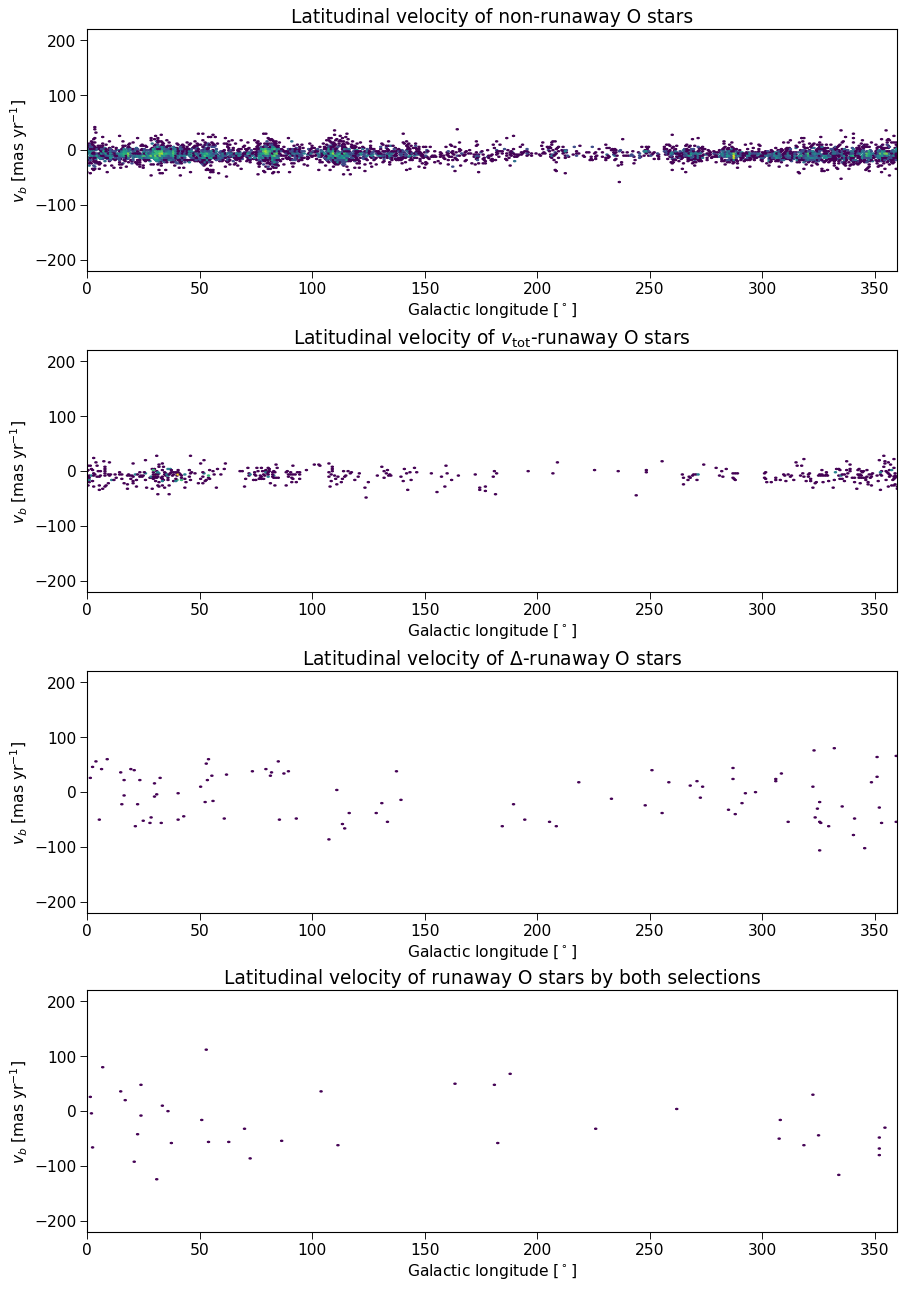

In [42]:
# vl, vb, vl_diff, vb_diff
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*20))
gs = GridSpec(4, 1, figure=fig1)
# fig1.suptitle("Peculiar proper motions of non-runaway B stars")
ax_lmul = fig1.add_subplot(gs[0,0])

# ax_lmub.scatter(l_filtered[extreme_runaway_filter], vl[extreme_runaway_filter],marker='+', c='C1', label='Extreme runaway star')

im_lmul = ax_lmul.hexbin(np.append(l_filtered[~Runaway_mask_1 & ~None_mask], l_filtered[~Runaway_mask_1 & None_mask_2]),
                         np.append(vl[~Runaway_mask_1 & ~None_mask], vl[~Runaway_mask_1 & None_mask_2]), 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{\ell*}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title('Longitudinal velocity of non-runaway O stars')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[~Runaway_mask_1 & None_mask_rad],
                         vl[~Runaway_mask_1 & None_mask_rad], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.scatter(l_filtered[extreme_vtot_filter], vl[extreme_vtot_filter], marker='+', c='C1', label='Extreme runaway star')
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{\ell*}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title(r'Longitudinal velocity of $v_{\mathrm{tot}}$-runaway O stars')

ax_lmub = fig1.add_subplot(gs[2,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask_1  & ~None_mask_rad], vl[Runaway_mask_1  & ~None_mask_rad], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.scatter(l_filtered[extreme_delta_filter], vl[extreme_delta_filter], marker='+', c='C1', label='Extreme runaway star')
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{\ell*}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title(r'Longitudinal velocity of $\Delta$-runaway O stars')

ax_lmub = fig1.add_subplot(gs[3,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask_1 & None_mask_rad], vl[Runaway_mask_1 & None_mask_rad], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{\ell*}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title(r'Longitudinal velocity of runaway O stars by both selections')
plt.savefig('img2/all_runaway_selections_vl_BP_O.png')

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# vl, vb, vl_diff, vb_diff
fig1=plt.figure(constrained_layout=True, figsize=(0.8*14,0.8*20))
gs = GridSpec(4, 1, figure=fig1)
# fig1.suptitle("Peculiar proper motions of non-runaway B stars")
ax_lmul = fig1.add_subplot(gs[0,0])

# Runaway_mask_1[~None_mask],  Runaway_mask_1[None_mask] | Runaway_mask_2
# np.append(l_filtered[~Runaway_mask_1 & ~None_mask], l_filtered[Runaway_mask_1[None_mask] | Runaway_mask_2])

im_lmul = ax_lmul.hexbin(np.append(l_filtered[~Runaway_mask_1 & ~None_mask], l_filtered[~Runaway_mask_1 & None_mask_2]),
                         np.append(vb[~Runaway_mask_1 & ~None_mask], vb[~Runaway_mask_1 & None_mask_2]), 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmul.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmul.set_ylabel(r'$v_{b}$ [mas yr$^{-1}$]')
ax_lmul.set_xlim(0,360)
ax_lmul.set_title('Latitudinal velocity of non-runaway O stars')

ax_lmub = fig1.add_subplot(gs[1,0])
im_lmub = ax_lmub.hexbin(l_filtered[~Runaway_mask_1 & None_mask_rad],
                         vb[~Runaway_mask_1 & None_mask_rad], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.scatter(l_filtered[extreme_vtot_filter], vb[extreme_vtot_filter], marker='+', c='C1', label='Extreme runaway star')
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title(r'Latitudinal velocity of $v_{\mathrm{tot}}$-runaway O stars')

ax_lmub = fig1.add_subplot(gs[2,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask_1  & ~None_mask_rad], vb[Runaway_mask_1  & ~None_mask_rad], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.scatter(l_filtered[extreme_delta_filter], vb[extreme_delta_filter], marker='+', c='C1', label='Extreme runaway star')
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title(r'Latitudinal velocity of $\Delta$-runaway O stars')

ax_lmub = fig1.add_subplot(gs[3,0])
im_lmub = ax_lmub.hexbin(l_filtered[Runaway_mask_1 & None_mask_rad], vb[Runaway_mask_1 & None_mask_rad], 
                         gridsize=[360,100], mincnt=1, bins='log', extent=[0,360,-200,200])
ax_lmub.set_xlabel(r'Galactic longitude [$^\circ$]')
ax_lmub.set_ylabel(r'$v_{b}$ [mas yr$^{-1}$]')
ax_lmub.set_xlim(0,360)
ax_lmub.set_title(r'Latitudinal velocity of runaway O stars by both selections')
# ax_lmub.scatter(l_filtered[extreme_runaway_filter], vb[extreme_runaway_filter],marker='+', c='C1', label='Extreme runaway star')
plt.savefig('img2/all_runaway_selections_vb_BP_O.png')